# Advanced Regression Assignment:::

## House price prediction using Ridge and Lasso Regression Techniques::

### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data:

Data has been provided in the file named "train.csv"

## Importing necessary libraries

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm

import os
from matplotlib.pyplot import xticks

# hide or compress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting options for displaying maximum rows and columns as there are high number of columns in the dataset

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

<b>Please note that below path is a local directory path. <i>Kindly change the path to the respective directory path from where this jupyter notebook is being executed </i></b>

In [3]:
# reading the dataset
houses_df = pd.read_csv(r"train.csv")
houses_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## Data Routine Check

In [4]:
houses_df.shape

(1460, 81)

In [5]:
# summary of the dataset: 
print(houses_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
houses_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   From the above statistics, we can observe that there are few outliers present in the data and we will be treating them moving formward.
 
</font></p>

In [7]:
#Identifying the percentage of null values for all the columns in a dataframe

round(100*(houses_df.isnull().sum()/len(houses_df)),2)[round(100*(houses_df.isnull().sum()/len(houses_df)),2)>0].sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [8]:
#All the NAN values have meaning for all the columns as given in data dictionary hence replacing with those values as
# provided in the data dictionary

houses_df['Alley'] = houses_df['Alley'].fillna('No alley access')
houses_df['BsmtQual'] = houses_df['BsmtQual'].fillna('No Basement')
houses_df['BsmtCond'] = houses_df['BsmtCond'].fillna('No Basement')
houses_df['BsmtExposure'] = houses_df['BsmtExposure'].fillna('No Basement')
houses_df['BsmtFinType1'] = houses_df['BsmtFinType1'].fillna('No Basement')
houses_df['BsmtFinType2'] = houses_df['BsmtFinType2'].fillna('No Basement')
houses_df['FireplaceQu'] = houses_df['FireplaceQu'].fillna('No Fireplace')
houses_df['GarageType'] = houses_df['GarageType'].fillna('No Garage')
houses_df['GarageFinish'] = houses_df['GarageFinish'].fillna('No Garage')
houses_df['GarageQual'] = houses_df['GarageQual'].fillna('No Garage')
houses_df['GarageCond'] = houses_df['GarageCond'].fillna('No Garage')
houses_df['PoolQC'] = houses_df['PoolQC'].fillna('No Pool')
houses_df['Fence'] = houses_df['Fence'].fillna('No Fence')
houses_df['MiscFeature'] = houses_df['MiscFeature'].fillna('None')

In [9]:
round(100*(houses_df.isnull().sum()/len(houses_df)),2)[round(100*(houses_df.isnull().sum()/len(houses_df)),2)>0].sort_values(ascending=False)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

In [10]:
# all numeric (float and int) variables in the dataset
houses_df.select_dtypes(include=['float64', 'int64'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60          NaN    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20          NaN    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20          NaN    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20          NaN    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20          NaN     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20          NaN     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85          NaN     9180            5            7   
43      44          20          NaN     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60          NaN    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

In [11]:
houses_df['MasVnrType'] = houses_df['MasVnrType'].fillna('None')
houses_df['MasVnrArea'] = houses_df['MasVnrArea'].fillna(0)

In [12]:
round(100*(houses_df.isnull().sum()/len(houses_df)),2)[round(100*(houses_df.isnull().sum()/len(houses_df)),2)>0].sort_values(ascending=False)

LotFrontage    17.74
GarageYrBlt     5.55
Electrical      0.07
dtype: float64

In [13]:
#Replace missing values of LotFrontage with Median
houses_df.loc[:,'LotFrontage'] = houses_df.loc[:, 'LotFrontage'].fillna(houses_df['LotFrontage'].median())

In [14]:
round(100*(houses_df.isnull().sum()/len(houses_df)),2)[round(100*(houses_df.isnull().sum()/len(houses_df)),2)>0].sort_values(ascending=False)

GarageYrBlt    5.55
Electrical     0.07
dtype: float64

In [15]:
#Replace missing values of Garage year built with Median

houses_df["GarageYrBlt"].fillna(houses_df["GarageYrBlt"].median(), inplace=True)

In [16]:
round(100*(houses_df.isnull().sum()/len(houses_df)),2)[round(100*(houses_df.isnull().sum()/len(houses_df)),2)>0].sort_values(ascending=False)

Electrical    0.07
dtype: float64

In [17]:
houses_df = houses_df.dropna()

In [18]:
round(100*(houses_df.isnull().sum()/len(houses_df)),2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   Now there are no null or NAN values present in the dataset.
 
</font></p>

In [19]:
houses_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
houses_df.shape

(1459, 81)

In [21]:
houses_df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
houses_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Univariate Analysis for Categorical Variables

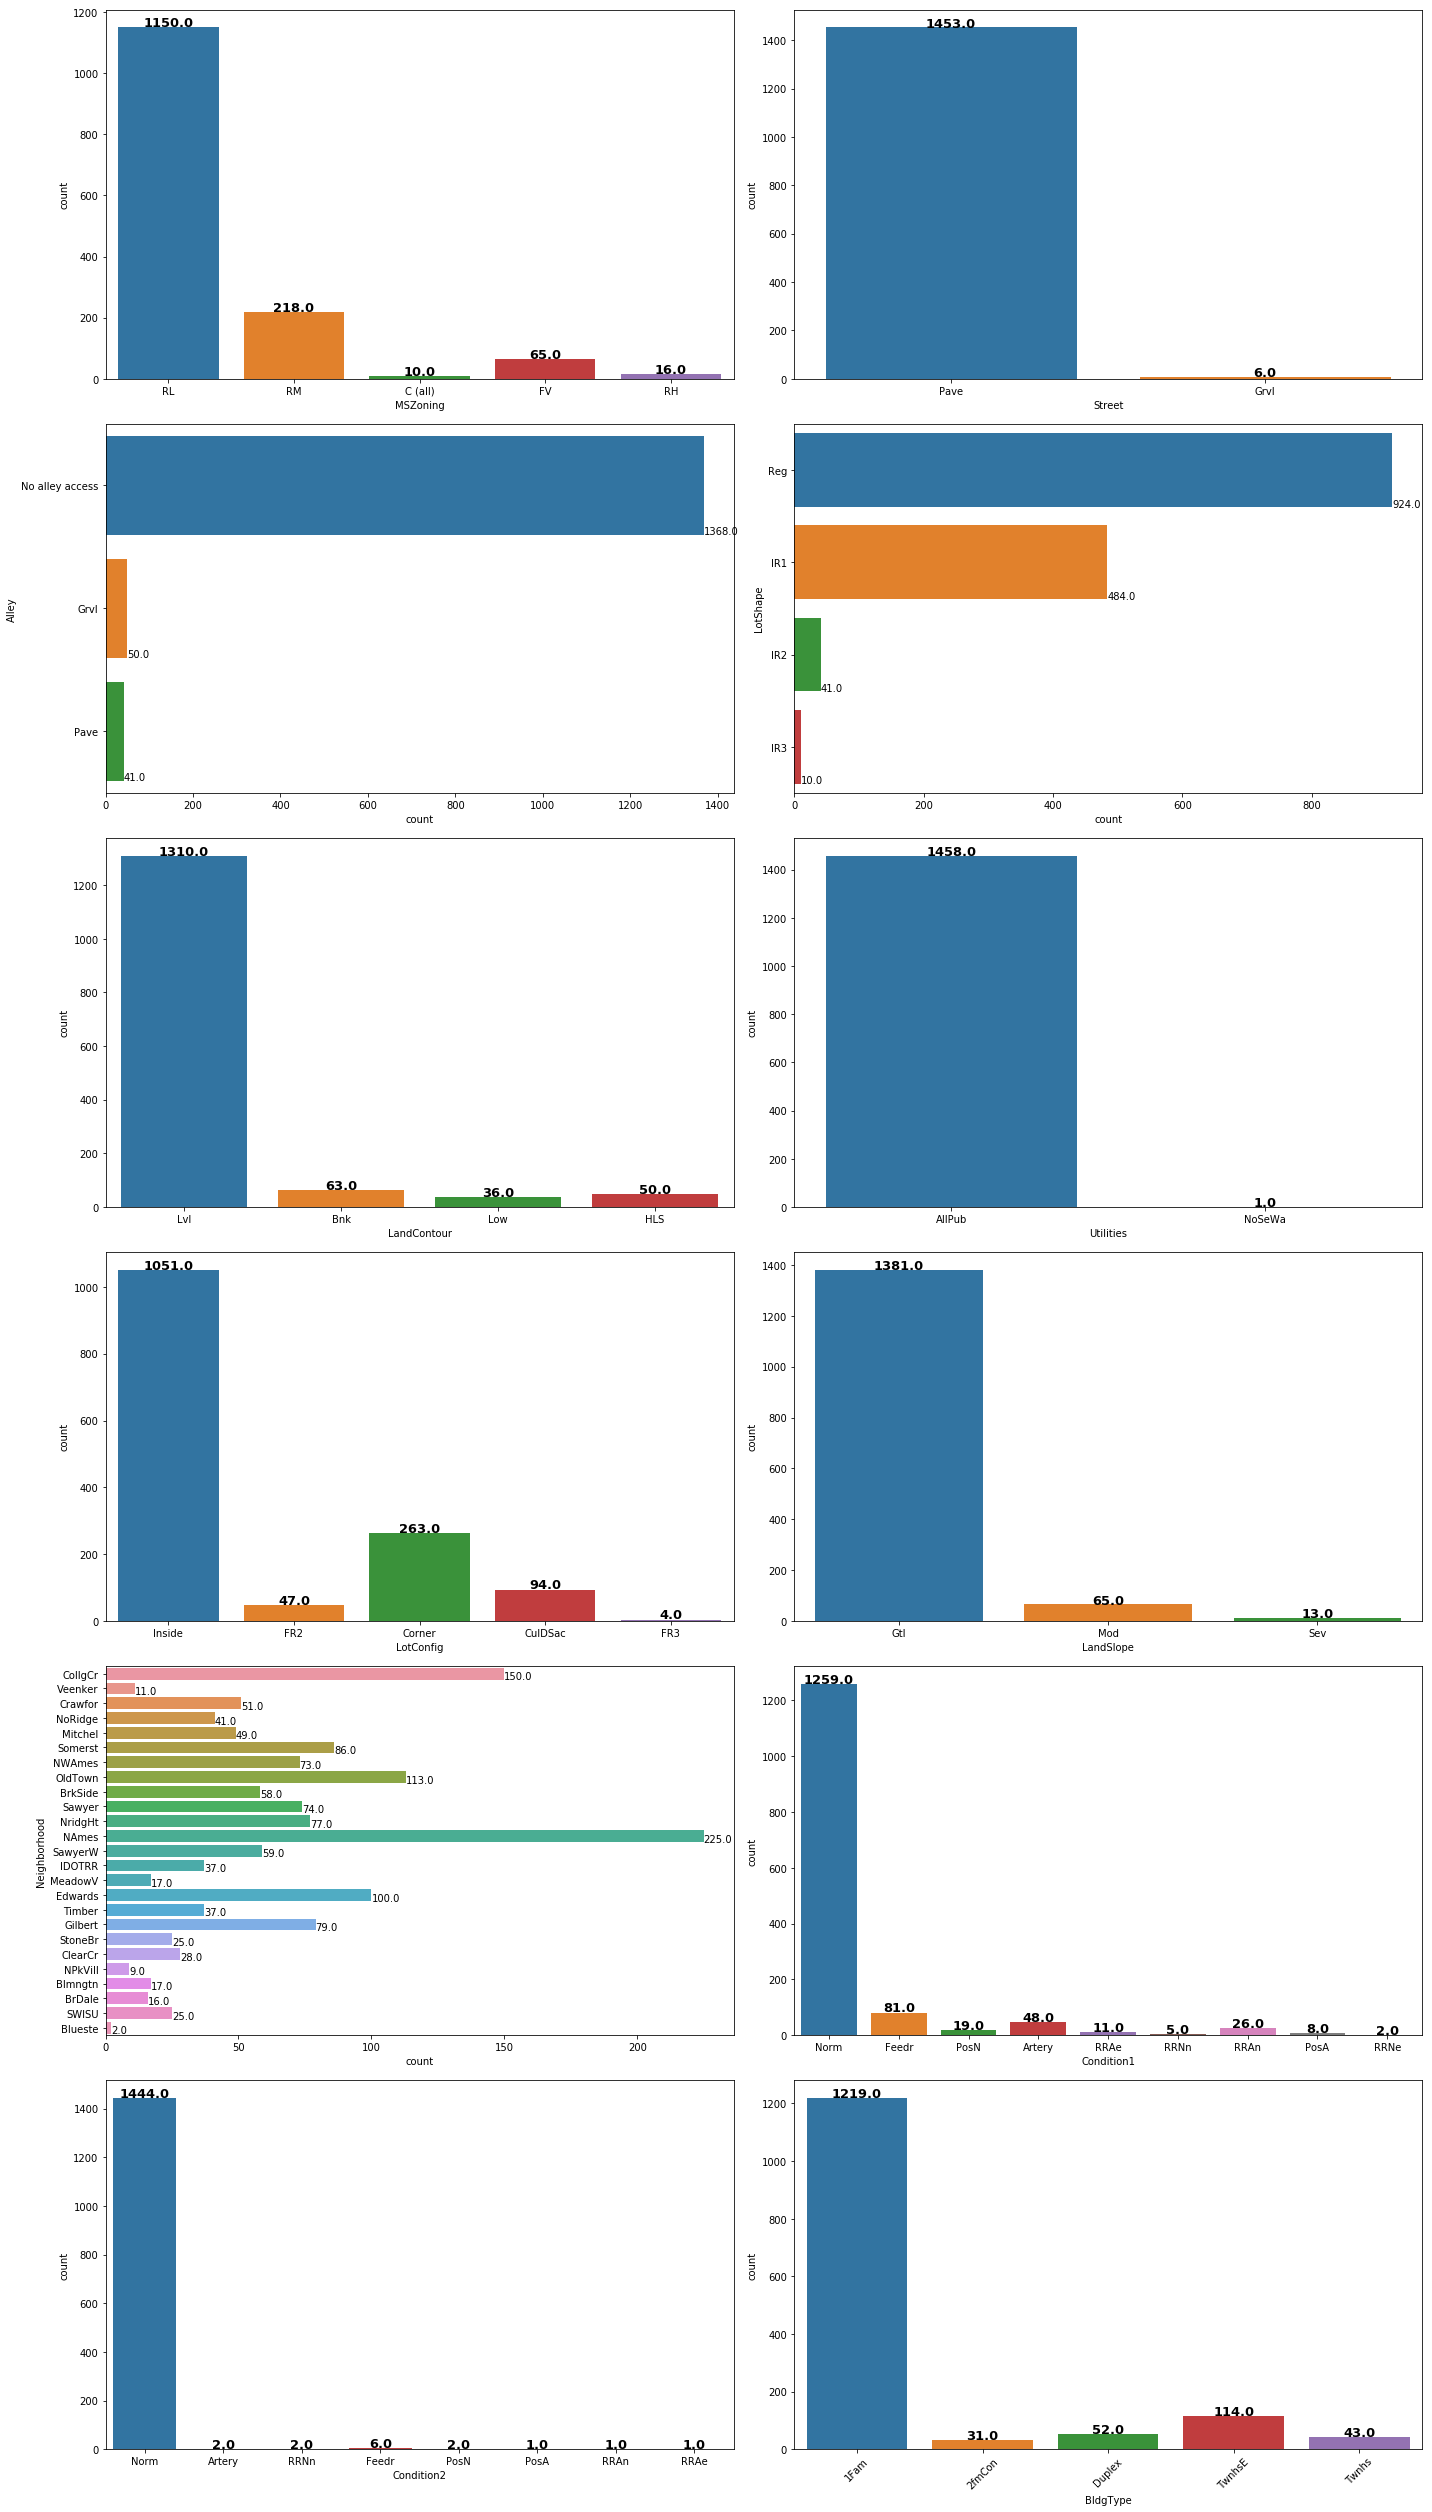

In [23]:
#plotting count plots using seaborn for remaining categorical variables with help of matplotlib library 

fig, axs= plt.subplots(6,2,figsize = (20,35))

# 'Do not Email'
ax = sns.countplot(houses_df['MSZoning'], ax = axs[0,0])
xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)


# 'Do not call'
ax = sns.countplot(houses_df['Street'], ax = axs[0,1])
xticks(rotation = 45)


for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

# Total visits
ax= sns.countplot(y=houses_df['Alley'], ax = axs[1,0])

for p in ax.patches:
        percentage = '{:1.1f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))


ax= sns.countplot(y=houses_df['LotShape'], ax = axs[1,1])



for p in ax.patches:
        percentage = '{:1.1f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))



# Page Views Per Visit
ax= sns.countplot(houses_df['LandContour'], ax = axs[2,0])
xticks(rotation = 45)


for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)



ax= sns.countplot(houses_df['Utilities'], ax = axs[2,1])
xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

                       
ax= sns.countplot(houses_df['LotConfig'], ax = axs[3,0])

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(houses_df['LandSlope'], ax = axs[3,1])

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(y=houses_df['Neighborhood'], ax = axs[4,0] )
xticks(rotation=45)


for p in ax.patches:
        percentage = '{:1.1f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
        
ax= sns.countplot(houses_df['Condition1'], ax = axs[4,1])

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(houses_df['Condition2'], ax = axs[5,0])


for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(houses_df['BldgType'], ax = axs[5,1])


for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

plt.tight_layout()
plt.show()


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   From the above plots, we can observe for all the categories like bulding type, neighbpourhood, utilities etc. to know which category is widely used and affect the pricing in the market
 
</font></p>

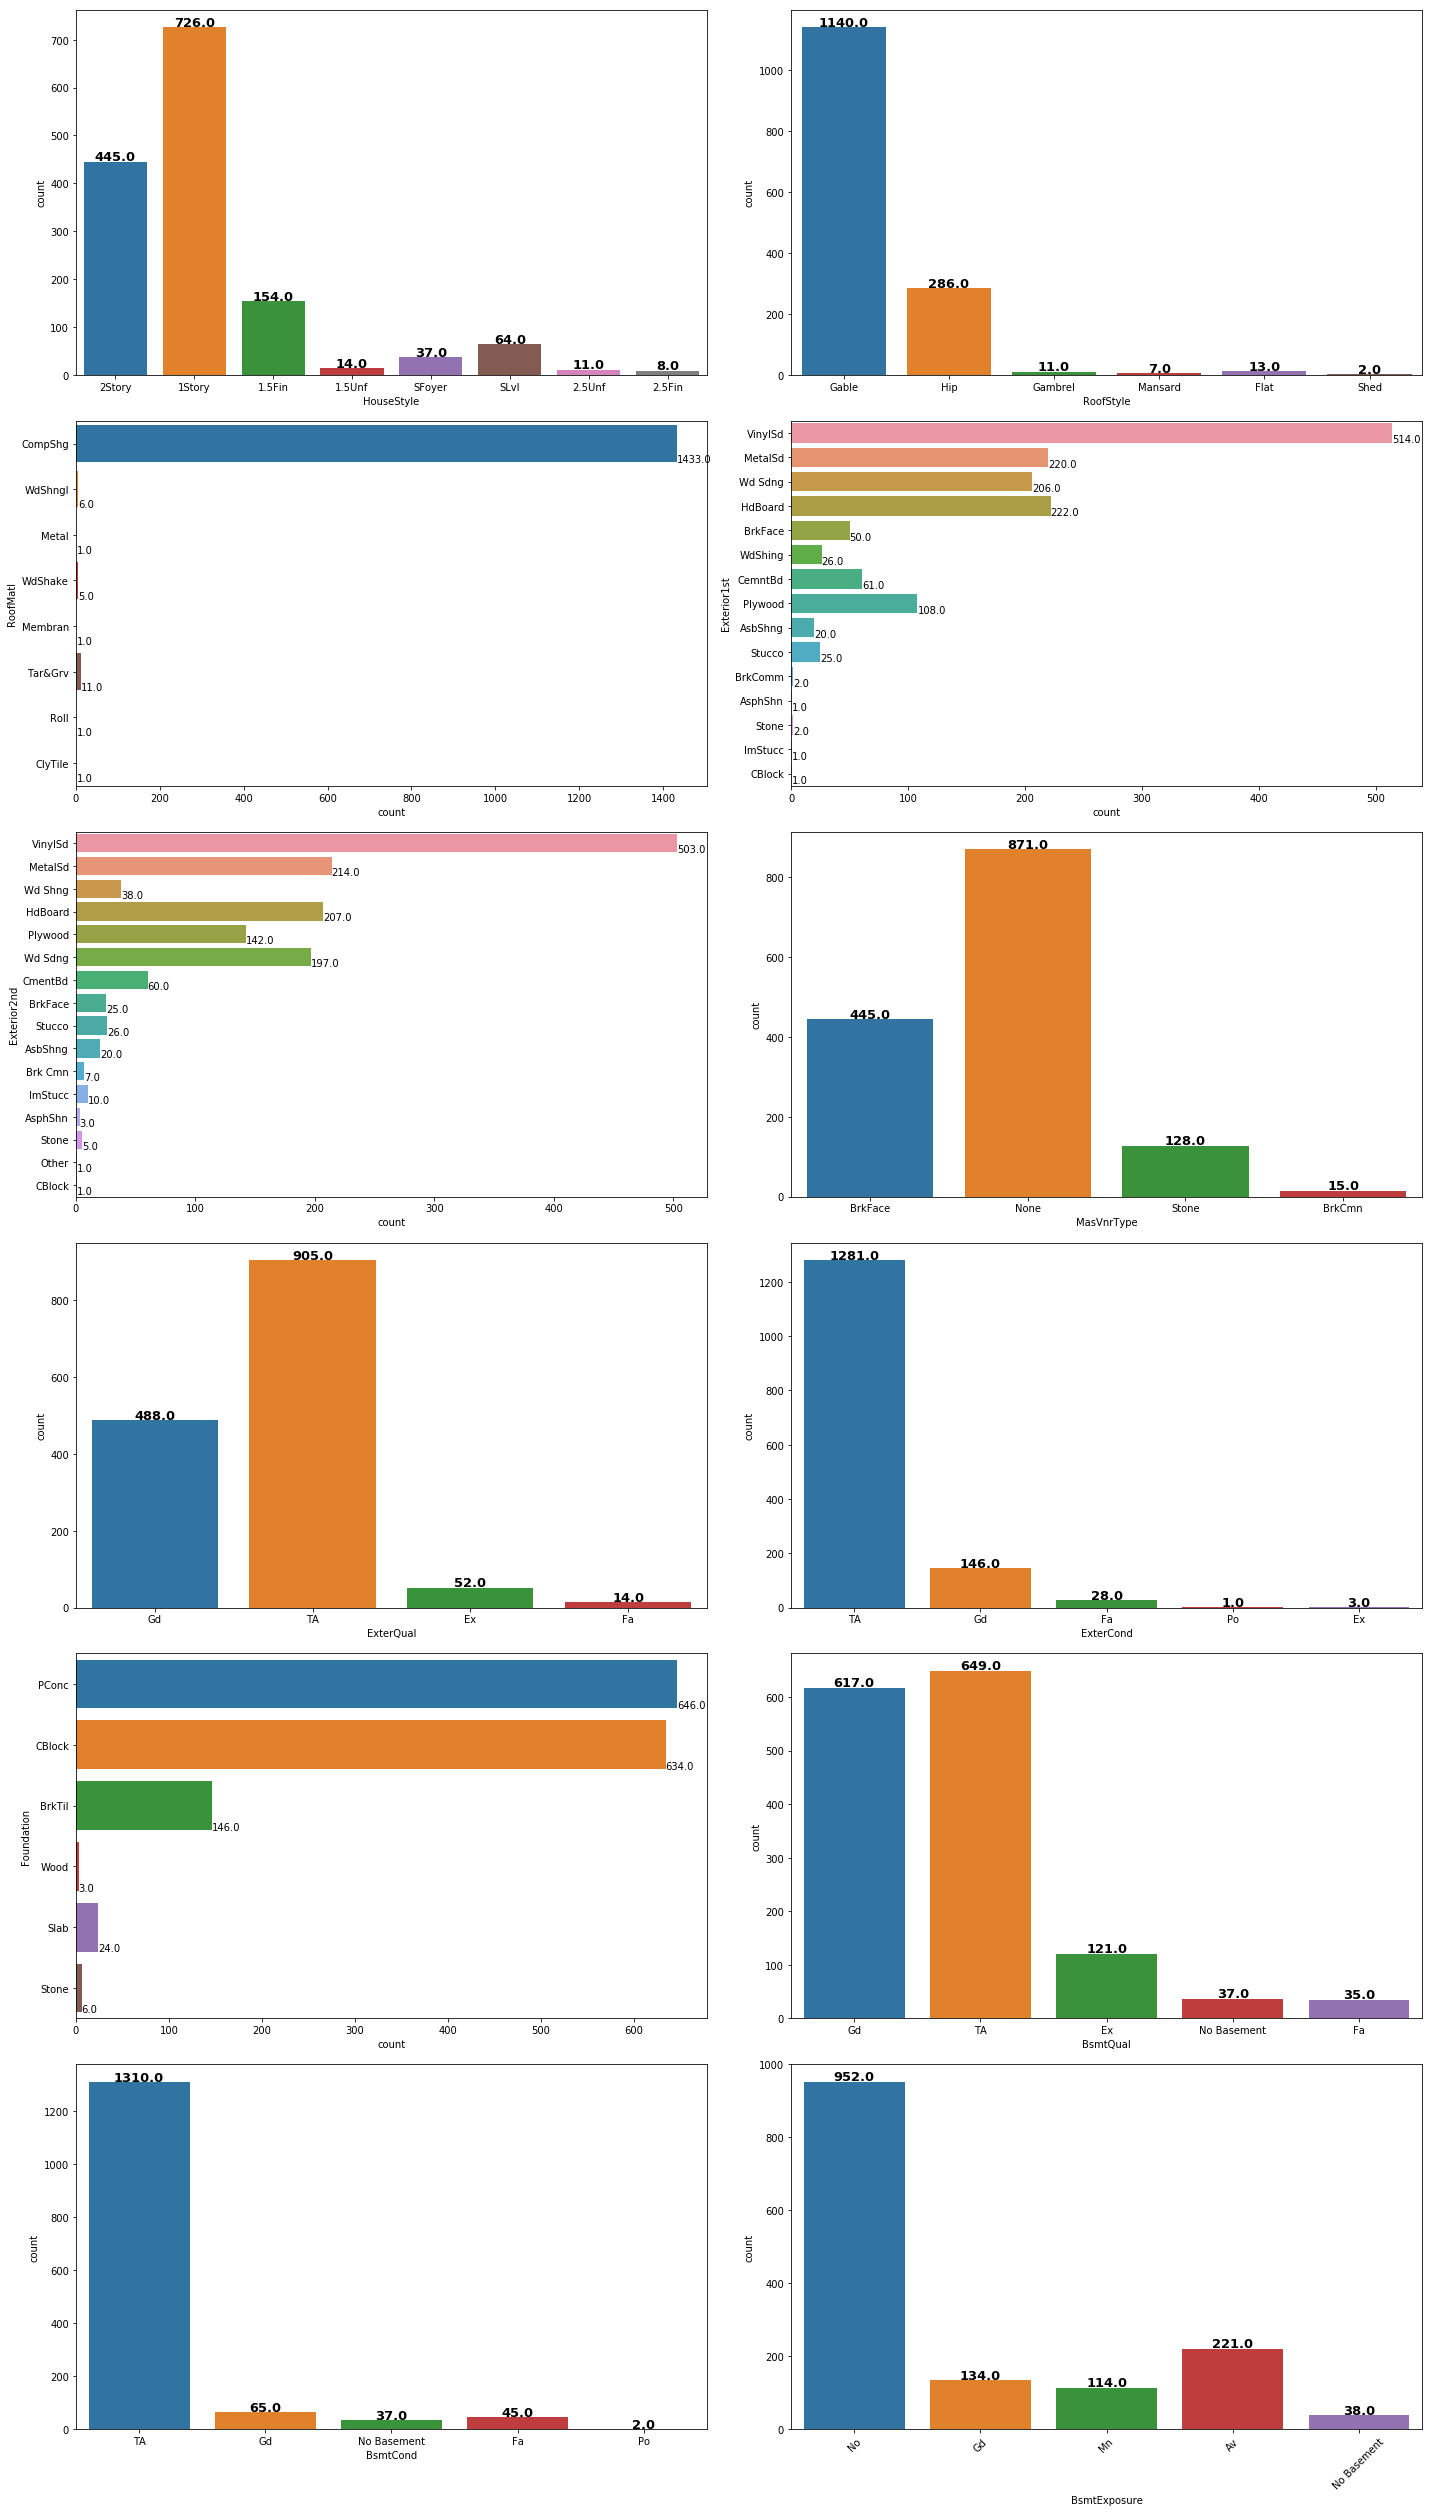

In [24]:
#plotting count plots using seaborn for remaining categorical variables with help of matplotlib library 

fig, axs= plt.subplots(6,2,figsize = (20,35))

# 'Do not Email'
ax = sns.countplot(houses_df['HouseStyle'], ax = axs[0,0])
xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)


# 'Do not call'
ax = sns.countplot(houses_df['RoofStyle'], ax = axs[0,1])
xticks(rotation = 45)


for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

# Total visits
ax= sns.countplot(y=houses_df['RoofMatl'], ax = axs[1,0])

for p in ax.patches:
        percentage = '{:1.1f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))


ax= sns.countplot(y=houses_df['Exterior1st'], ax = axs[1,1])



for p in ax.patches:
        percentage = '{:1.1f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))



# Page Views Per Visit
ax= sns.countplot(y=houses_df['Exterior2nd'], ax = axs[2,0])
xticks(rotation = 45)


for p in ax.patches:
        percentage = '{:1.1f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))



ax= sns.countplot(houses_df['MasVnrType'], ax = axs[2,1])
xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

                       
ax= sns.countplot(houses_df['ExterQual'], ax = axs[3,0])

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(houses_df['ExterCond'], ax = axs[3,1])

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(y=houses_df['Foundation'], ax = axs[4,0] )
xticks(rotation=45)


for p in ax.patches:
        percentage = '{:1.1f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
        
ax= sns.countplot(houses_df['BsmtQual'], ax = axs[4,1])

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(houses_df['BsmtCond'], ax = axs[5,0])


for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)
        
ax= sns.countplot(houses_df['BsmtExposure'], ax = axs[5,1])


for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

plt.tight_layout()
plt.show()


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   From the above plots, we can observe that Gable roof style and houses with one storied floor are more among all other categories.
</font></p>

## Univariate Analysis for Numeric Variables

In [25]:
#Defining a common function for plotting distribution plot for all numeric variables
#Plot univariate distribution of one feature

def distribution_plot(feature,color):

    plt.figure(figsize=(20, 14))
    plt.subplot(2, 1, 1)
    plt.title('Distribution plot for numerical variables')
    sns.distplot(houses_df[feature],color=color, kde=True)
      
    plt.show() 

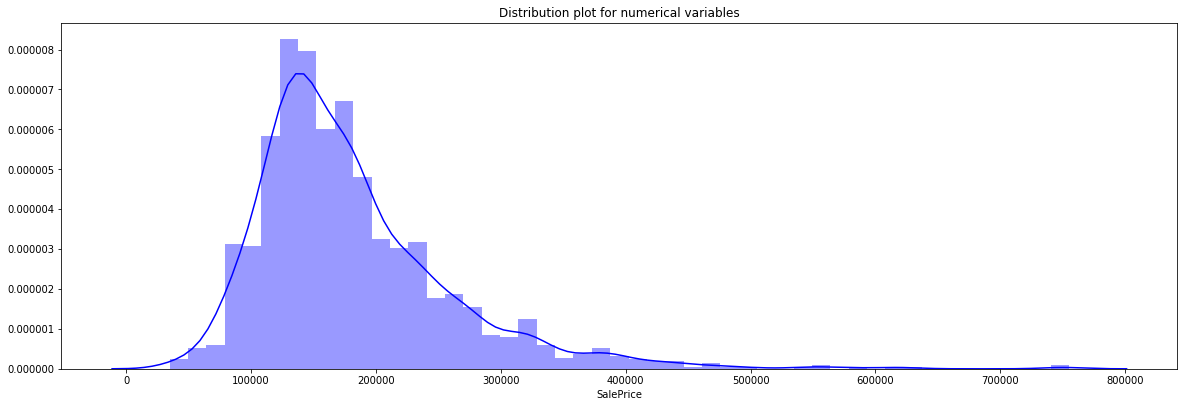

In [26]:
distribution_plot('SalePrice','blue')

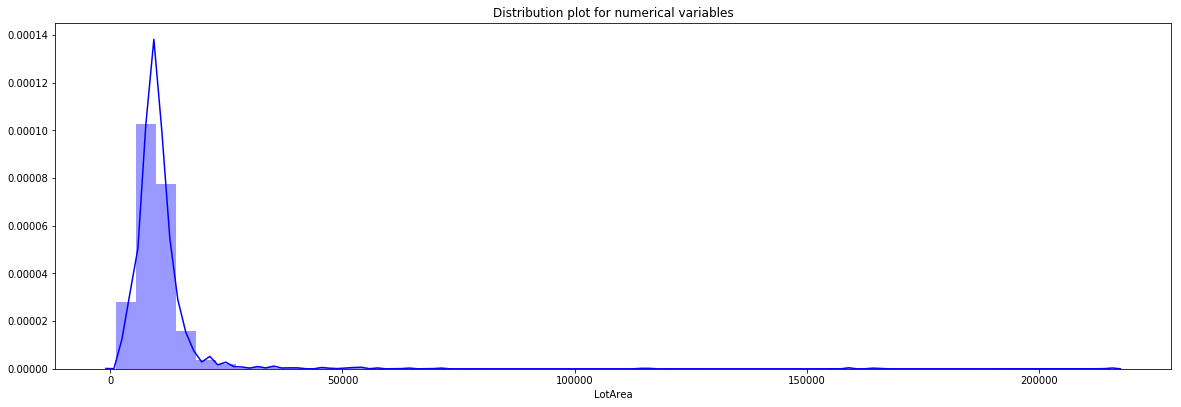

In [27]:
distribution_plot('LotArea','blue')

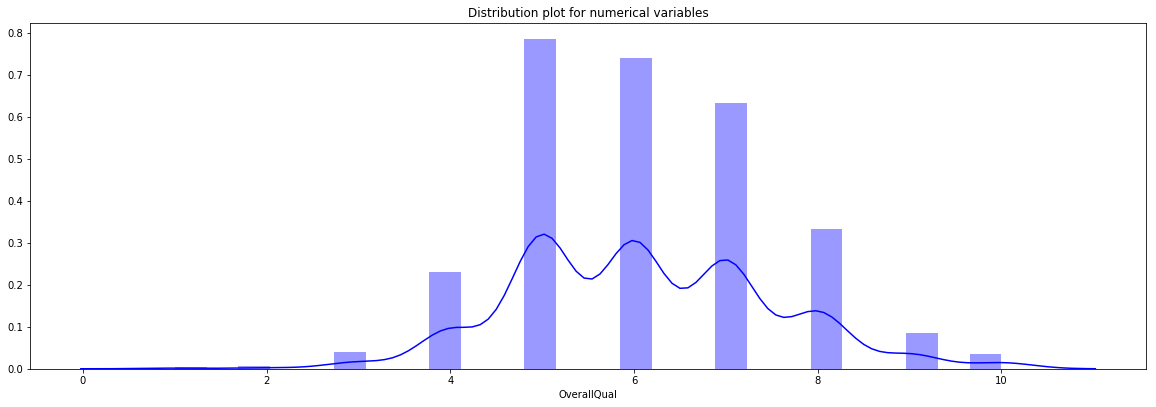

In [28]:
distribution_plot('OverallQual','blue')

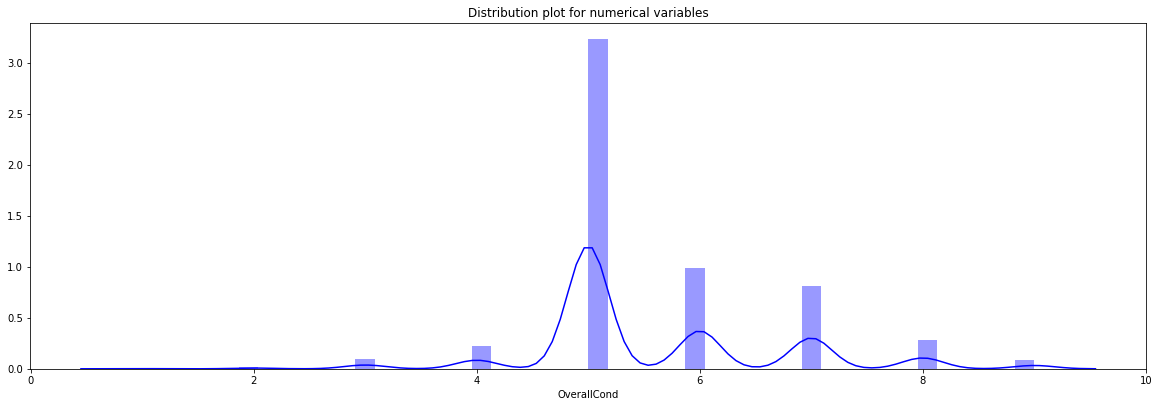

In [29]:
distribution_plot('OverallCond','blue')

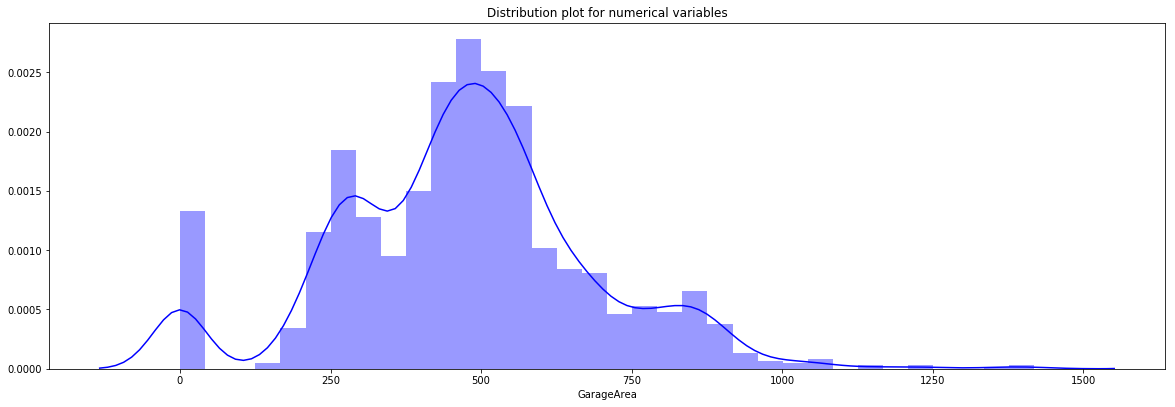

In [30]:
distribution_plot('GarageArea','blue')


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   since the Saleprice target variable figures are skewed towards left and not normally distributed, we will apply the log transformation to obtain a normally distributed target variable. 
</font></p>

## Bivariate Analysis

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 11 Text xticklabel objects>)

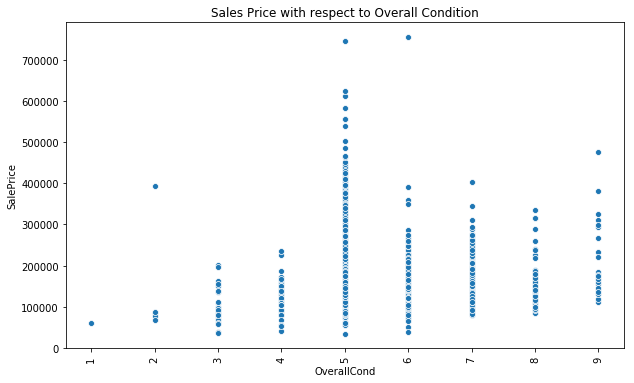

In [31]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x="OverallCond", y="SalePrice", data= houses_df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   overallcond affects the saleprice as seen in the above plot.
</font></p>

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 7 Text xticklabel objects>)

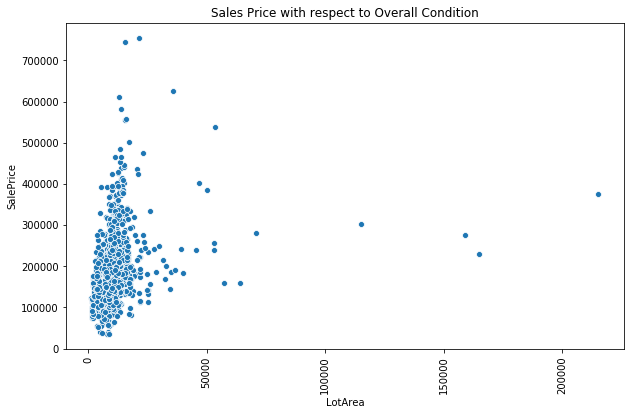

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="LotArea", y="SalePrice", data= houses_df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
  LotArea is positively correlated with saleprice as seen from the above graph
</font></p>

(array([1860., 1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020.]),
 <a list of 9 Text xticklabel objects>)

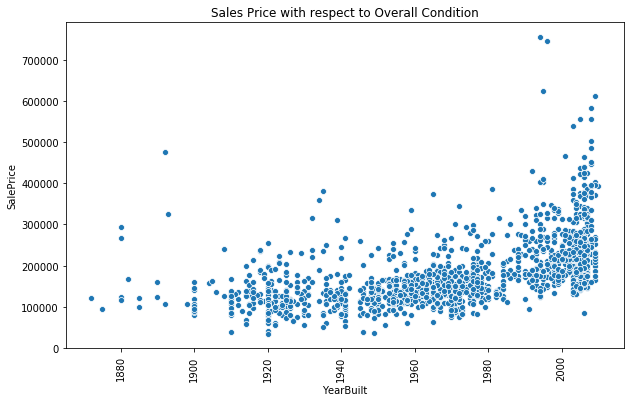

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="YearBuilt", y="SalePrice", data= houses_df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

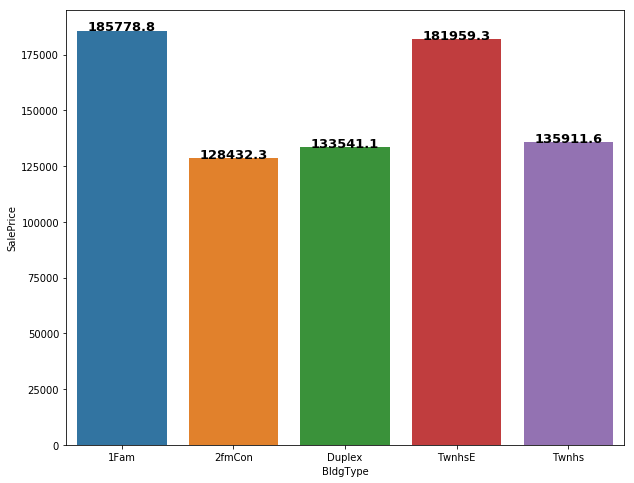

In [34]:
plt.figure(figsize=(10,8))

ax = sns.barplot(x='BldgType',y='SalePrice',data= houses_df, ci=None)
#xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   Building type with values as 1 family is more preferred.
</font></p>

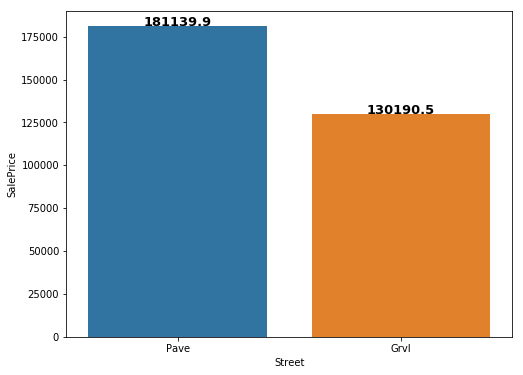

In [35]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x='Street',y='SalePrice',data= houses_df, ci=None)
#xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

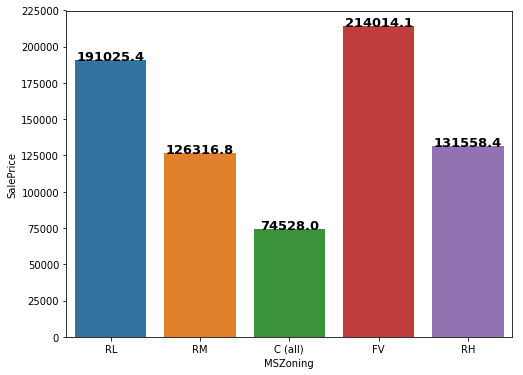

In [36]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x='MSZoning',y='SalePrice',data= houses_df,ci=None)
#xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

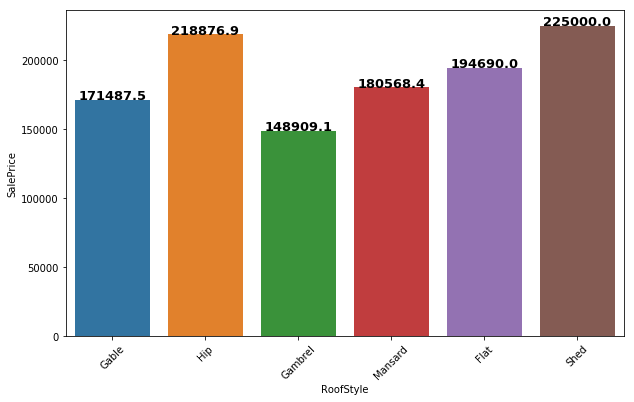

In [37]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x='RoofStyle',y='SalePrice',data= houses_df, ci=None)
xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

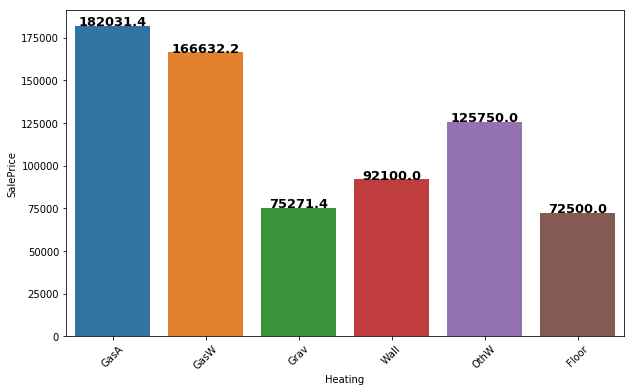

In [38]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x='Heating',y='SalePrice',data= houses_df, ci=None)
xticks(rotation = 45)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

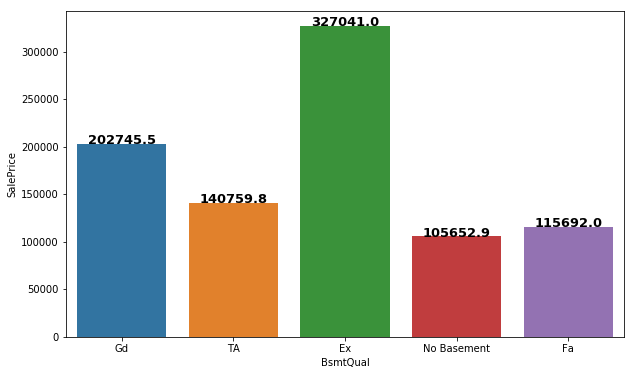

In [39]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x='BsmtQual',y='SalePrice',data= houses_df, ci=None)

for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}'.format(height),
                ha="center", weight='bold', fontsize=13)

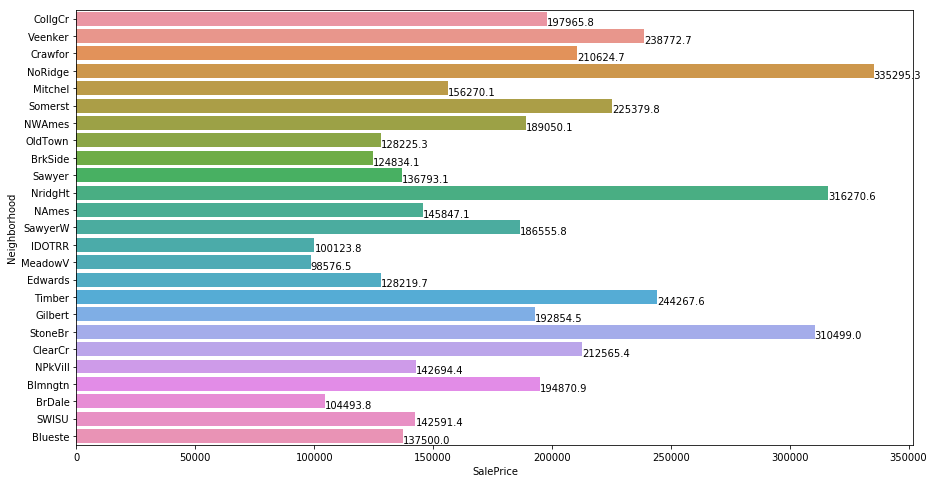

In [40]:
plt.figure(figsize=(15,8))

ax = sns.barplot(y='Neighborhood',x='SalePrice',data= houses_df, ci=None)
#xticks(rotation = 45)

for p in ax.patches:
        percentage = '{:1.1f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
From the above plots we can observe that which categories are more preferred while selling the house.
    like heating gasA, neighbourhood as noRidge, roofstyle gable and shed etc.</font></p>

In [41]:
houses_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0   1          60       RL         65.0     8450   Pave  No alley access   
1   2          20       RL         80.0     9600   Pave  No alley access   
2   3          60       RL         68.0    11250   Pave  No alley access   
3   4          70       RL         60.0     9550   Pave  No alley access   
4   5          60       RL         84.0    14260   Pave  No alley access   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1      

## Plotting heatmap for Correlations

In [42]:
houses_df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.010589    -0.010080 -0.033170    -0.027553   
MSSubClass     0.010589    1.000000    -0.356810 -0.139766     0.032936   
LotFrontage   -0.010080   -0.356810     1.000000  0.304533     0.234942   
LotArea       -0.033170   -0.139766     0.304533  1.000000     0.105786   
OverallQual   -0.027553    0.032936     0.234942  0.105786     1.000000   
OverallCond    0.013167   -0.059134    -0.053235 -0.005665    -0.092243   
YearBuilt     -0.013945    0.027435     0.116627  0.014296     0.573334   
YearRemodAdd  -0.023158    0.040199     0.083277  0.013852     0.551605   
MasVnrArea    -0.050515    0.023792     0.178545  0.103302     0.407075   
BsmtFinSF1    -0.004001   -0.069501     0.214533  0.214121     0.239265   
BsmtFinSF2    -0.005668   -0.065549     0.042493  0.111158    -0.059291   
BsmtUnfSF     -0.007508   -0.140627     0.124147 -0.002641     0.308018   
TotalBsmtSF   -0.013815   -0.238160     0.363919  0.260962     0.537523   
1stFlrSF       0.011627   -0.251484     0.414037  0.299533     0.475933   
2ndFlrSF       0.004885    0.307713     0.072334  0.051030     0.295969   
LowQualFinSF  -0.044139    0.046524     0.037481  0.004773    -0.030502   
GrLivArea      0.008524    0.074949     0.368039  0.263109     0.593021   
BsmtFullBath   0.003158    0.003799     0.090444  0.158147     0.110700   
BsmtHalfBath  -0.019917   -0.002243    -0.006956  0.048034    -0.040291   
FullBath       0.004758    0.131354     0.180497  0.126100     0.551267   
HalfBath       0.005494    0.177004     0.047126  0.014333     0.274328   
BedroomAbvGr   0.037577   -0.023502     0.236828  0.119700     0.101789   
KitchenAbvGr   0.003177    0.281833    -0.004884 -0.017796    -0.184040   
TotRmsAbvGrd   0.026948    0.040274     0.320501  0.190037     0.427720   
Fireplaces    -0.018788   -0.045232     0.233388  0.271398     0.396455   
GarageYrBlt   -0.001375    0.081000     0.062911 -0.025813     0.515236   
GarageCars     0.016254   -0.040232     0.269520  0.154893     0.600991   
GarageArea     0.018010   -0.098558     0.323559  0.180392     0.561980   
WoodDeckSF    -0.029716   -0.012598     0.075538  0.171701     0.239000   
OpenPorchSF    0.000267   -0.005838     0.137107  0.084751     0.308554   
EnclosedPorch  0.003272   -0.011904     0.010323 -0.018360    -0.114162   
3SsnPorch     -0.046550   -0.043786     0.061957  0.020417     0.030314   
ScreenPorch    0.001617   -0.025932     0.037683  0.043147     0.064755   
PoolArea       0.057163    0.008309     0.180827  0.077669     0.065143   
MiscVal       -0.006155   -0.007651    -0.000247  0.038063    -0.031461   
MoSold         0.021708   -0.013404     0.010499  0.001179     0.070570   
YrSold         0.000566   -0.021461     0.006367 -0.014254    -0.027277   
SalePrice     -0.021756   -0.084230     0.334793  0.263837     0.791069   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.013167  -0.013945     -0.023158   -0.050515   -0.004001   
MSSubClass       -0.059134   0.027435      0.040199    0.023792   -0.069501   
LotFrontage      -0.053235   0.116627      0.083277    0.178545    0.214533   
LotArea          -0.005665   0.014296      0.013852    0.103302    0.214121   
OverallQual      -0.092243   0.573334      0.551605    0.407075    0.239265   
OverallCond       1.000000  -0.375780      0.074158   -0.125922   -0.046595   
YearBuilt        -0.375780   1.000000      0.592512    0.312227    0.250465   
YearRemodAdd      0.074158   0.592512      1.000000    0.177038    0.129259   
MasVnrArea       -0.125922   0.312227      0.177038    1.000000    0.260989   
BsmtFinSF1       -0.046595   0.250465      0.129259    0.260989    1.000000   
BsmtFinSF2        0.040132  -0.048903     -0.067575   -0.071453   -0.050328   
BsmtUnfSF        -0.137008   0.149444      0.181520    0.113719   -0.495718   
TotalBsmtSF      -0.171796   0.393159      0.292546    0.359798    0

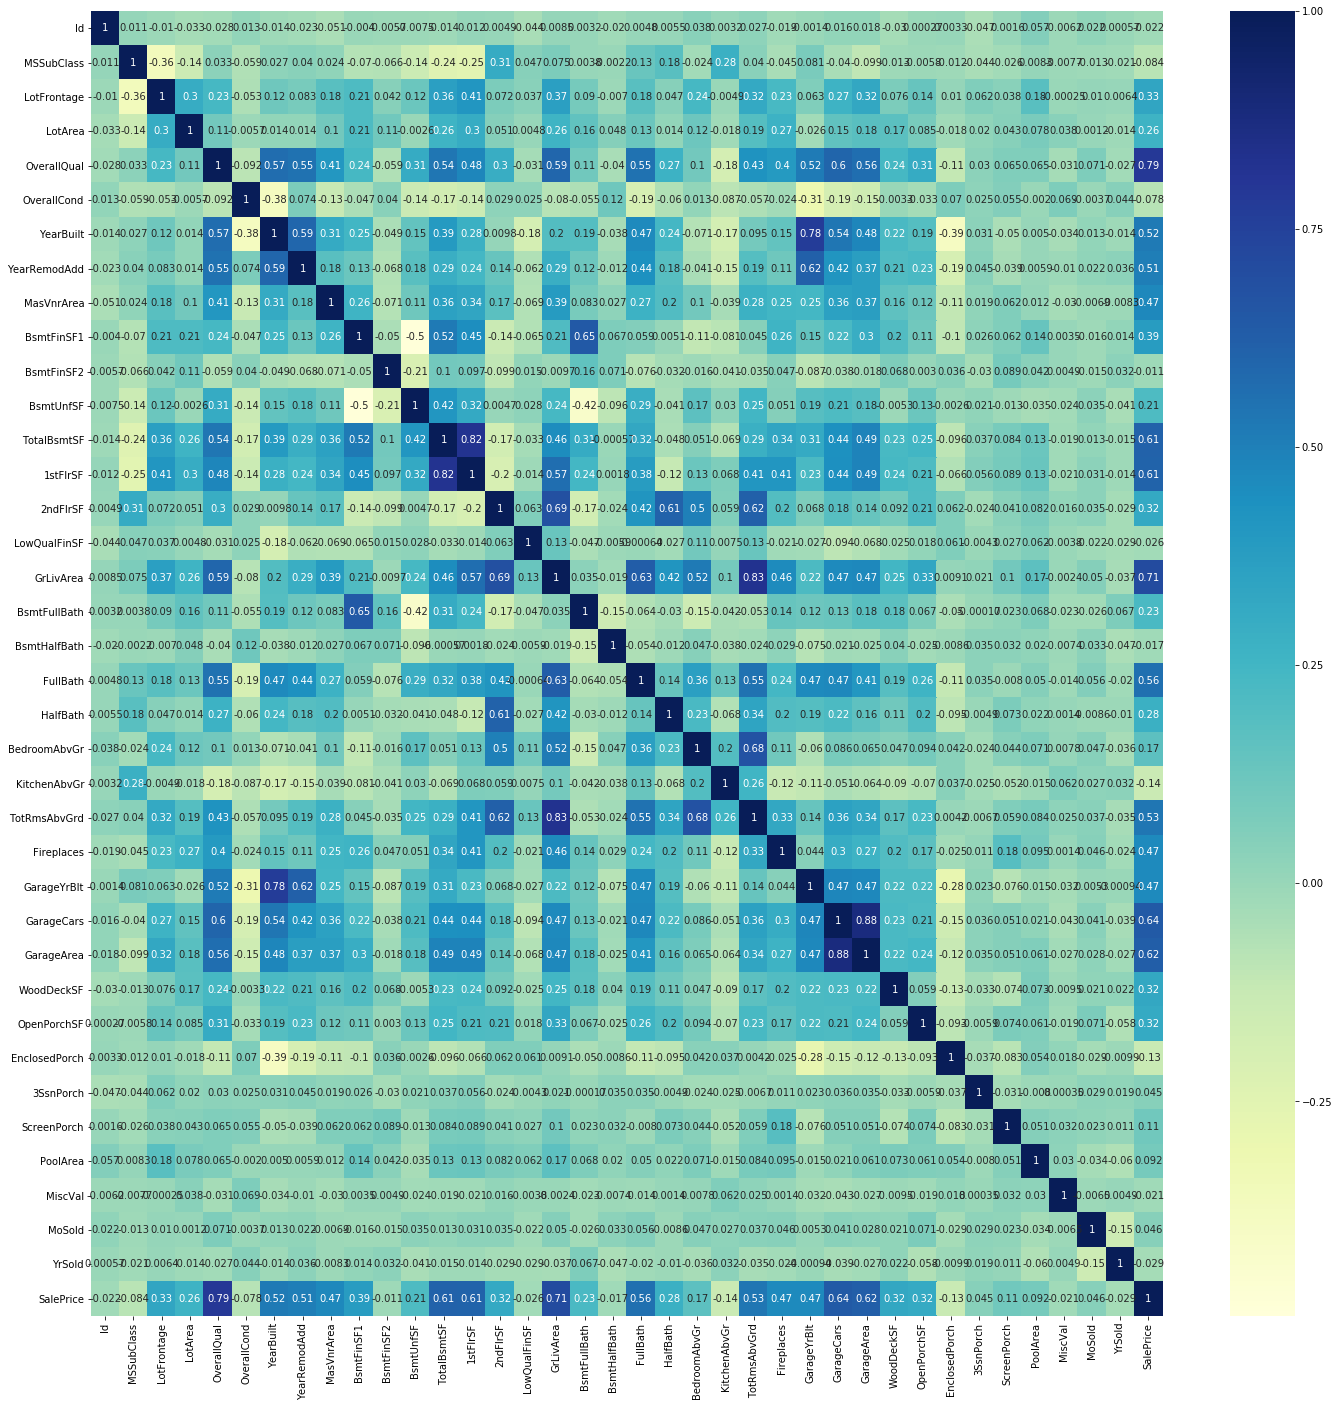

In [43]:
plt.figure(figsize=(24,24))
corrmat=houses_df.corr()
sns.heatmap(corrmat,cmap='YlGnBu',annot=True)
plt.show()


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
It can be observed from the above plot that columns 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt' are highly correlated with 'Sale Price'.  <br><br>Also, we will not be dropping highly correlated columns as ridge and lasso regression takes care of multicollinearity issue.
</font></p>

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text xticklabel objects>)

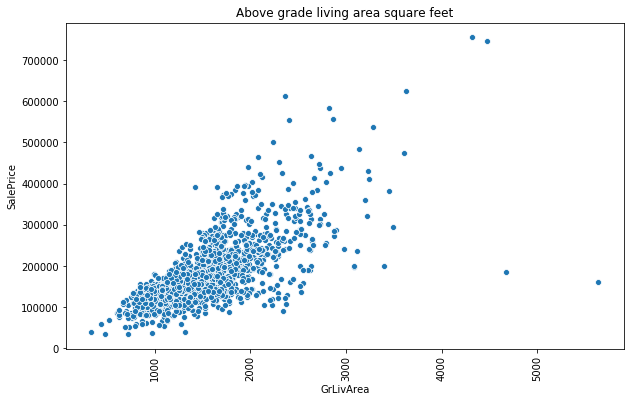

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="GrLivArea", y="SalePrice", data= houses_df)
plt.title("Above grade living area square feet")
plt.xticks(rotation=90)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text xticklabel objects>)

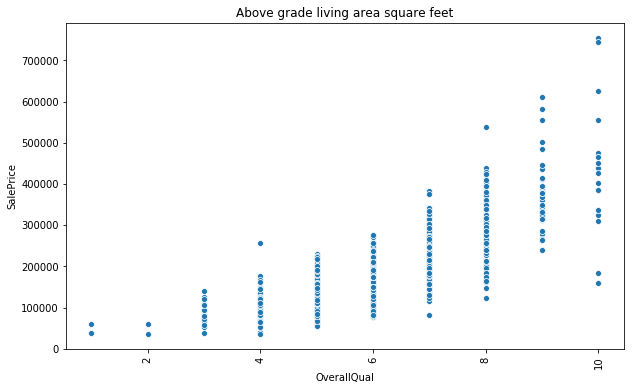

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="OverallQual", y="SalePrice", data= houses_df)
plt.title("Above grade living area square feet")
plt.xticks(rotation=90)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text xticklabel objects>)

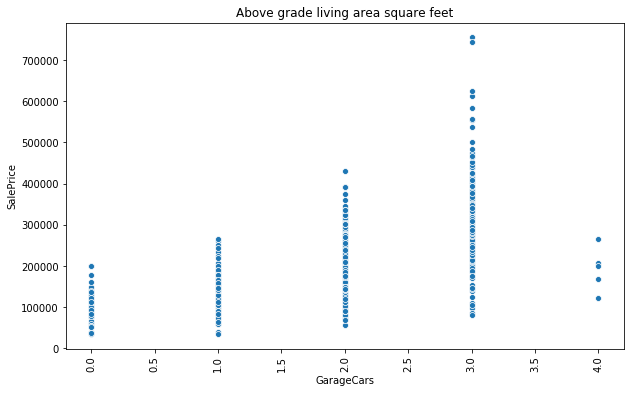

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="GarageCars", y="SalePrice", data= houses_df)
plt.title("Above grade living area square feet")
plt.xticks(rotation=90)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]), <a list of 9 Text xticklabel objects>)

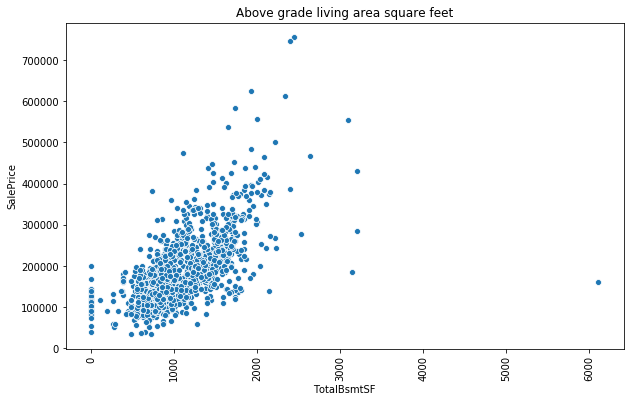

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data= houses_df)
plt.title("Above grade living area square feet")
plt.xticks(rotation=90)


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   It can be observed from the above plot that columns 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt' are highly correlated with 'Sale Price'. 
</font></p>

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]), <a list of 10 Text xticklabel objects>)

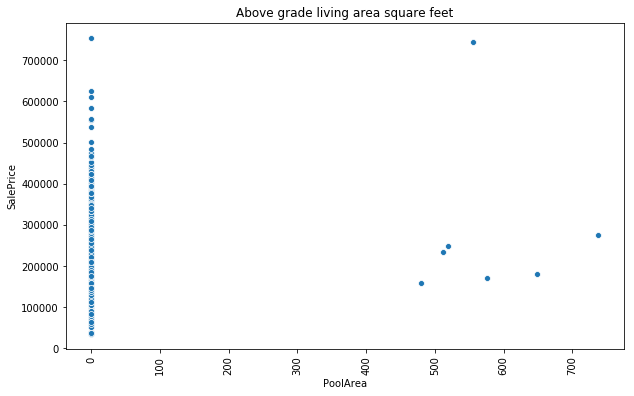

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PoolArea", y="SalePrice", data= houses_df)
plt.title("Above grade living area square feet")
plt.xticks(rotation=90)

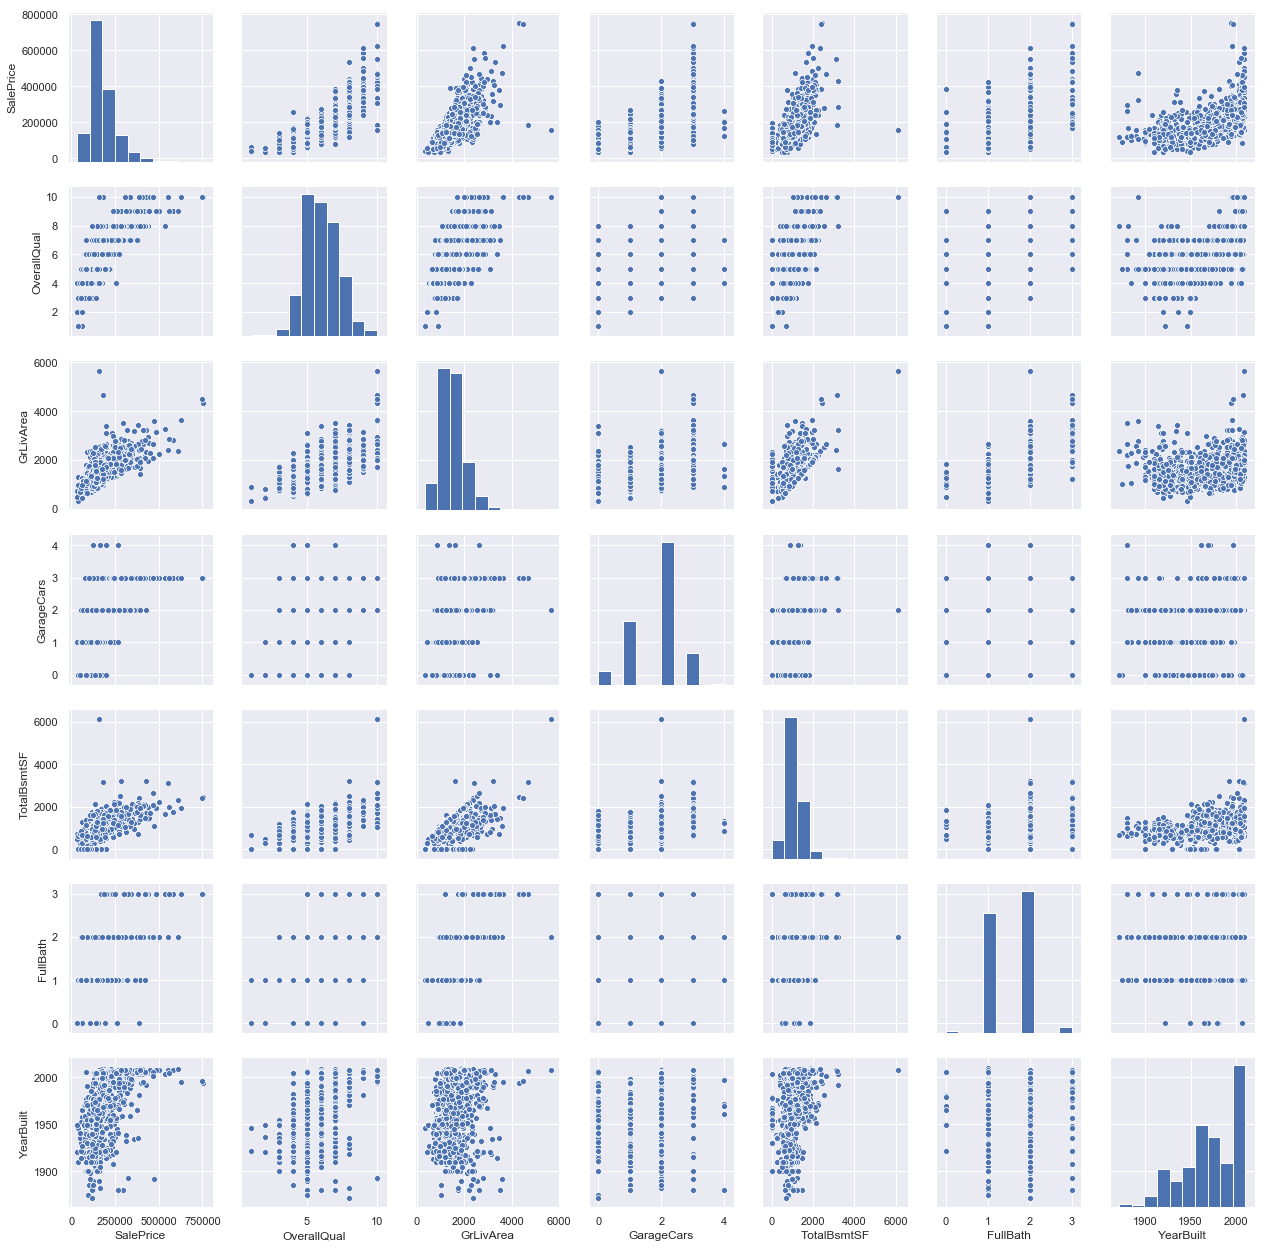

In [49]:
sns.set()
columns=['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(houses_df[columns])
plt.show()

## Outliers check and treatment 

In [50]:
houses_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1459.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    730.054832    56.881426    69.861549   10517.363948     6.100069   
std     421.411181    42.310746    22.035077    9984.666267     1.383171   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.500000    20.000000    60.000000    7549.000000     5.000000   
50%     730.000000    50.000000    69.000000    9477.000000     6.000000   
75%    1094.500000    70.000000    79.000000   11603.000000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000   
mean      5.575737  1971.244003   1984.850583   103.187800   443.943797   
std       1.113079    30.199555     20.644343   180.773158   456.106417   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   384.000000   
75%       6.000000  2000.000000   2004.000000   164.500000   712.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean     46.581220   567.366004  1057.891021  1162.906785   346.791638   
std     161.369977   441.992392   438.500975   386.572089   436.610637   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   796.000000   882.000000     0.000000   
50%       0.000000   479.000000   992.000000  1088.000000     0.000000   
75%       0.000000   808.000000  1298.500000  1391.500000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1459.000000   1459.000000  1459.000000   
mean       5.848526  1515.546950      0.425634      0.057574     1.564770   
std       48.639512   525.650927      0.518969      0.238830     0.550987   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.000000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1777.500000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.000000   
mean      0.382454      2.866347      1.046607      6.517478     0.613434   
std       0.502798      0.816050      0.220410      1.625902     0.644687   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean   1978.569568     1.766964   473.030158    94.240576    46.692255   
std      23.993708     0.747546   213.869604   125.381679    66.267472   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1962.000000     1.000000   333.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2001.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [51]:
houses_df.shape

(1459, 81)

In [52]:
houses_df = houses_df[houses_df['GrLivArea']<4000]

In [53]:
houses_df = houses_df[houses_df['TotalBsmtSF']<=3000]

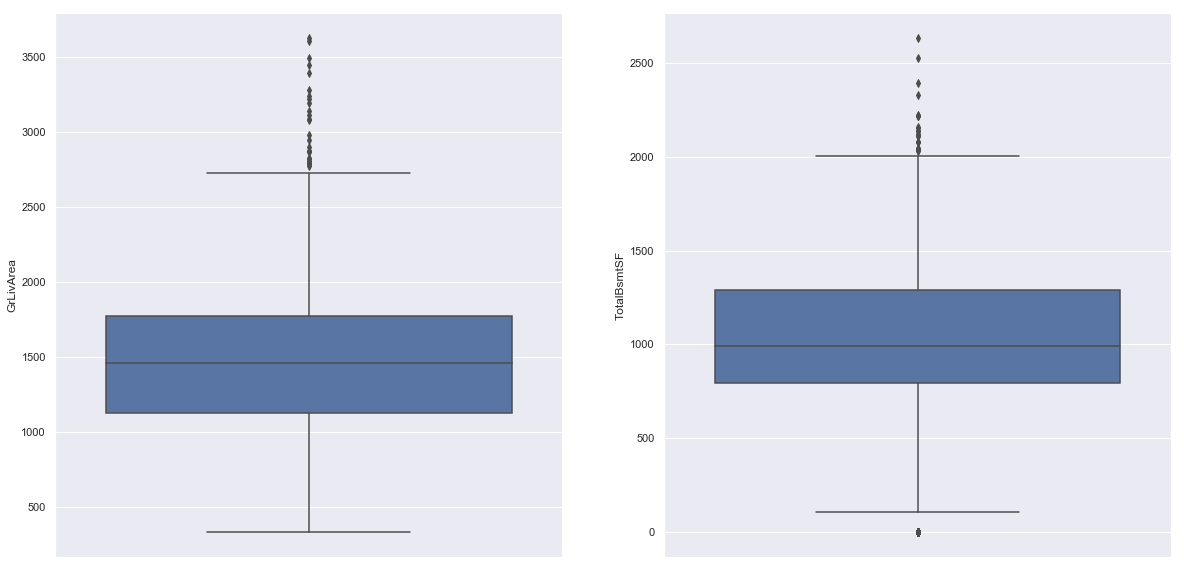

In [54]:
#plotting the numeric variables again to see their plot after outlier data removal.

plt.figure(figsize=(20, 10))

# subplot 1: GrLivArea
plt.subplot(1, 2, 1)
sns.boxplot(y=houses_df['GrLivArea'])

# subplot 1: TotalBsmtSF
plt.subplot(1, 2, 2)
sns.boxplot(y=houses_df['TotalBsmtSF'])



<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   Outliers have been treated for "TotalBsmtSF" and "GrLivArea" as shown above. 
</font></p>

## Normal distribution plot for target variable "SalePrice"

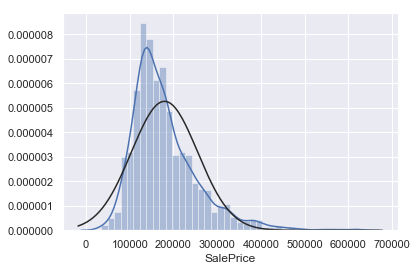

In [55]:
sns.distplot(houses_df['SalePrice'],fit=norm)


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
It can be observed from the above plot that the "SalePrice" column is not normally distributed,so applying long tranfomration to make it normally ditributed and then proceed for regression modeling.
</font></p>

In [56]:
houses_df['SalePrice']=np.log(houses_df['SalePrice'])

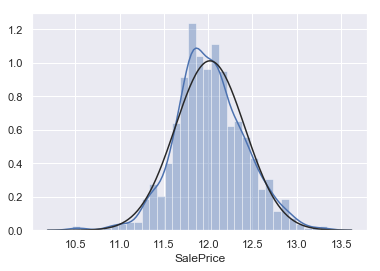

In [57]:
sns.distplot(houses_df['SalePrice'],fit=norm)

## Creating New Derived Features


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   We can create a new derived feature for creating property of an age.
</font></p>

In [58]:
import datetime

houses_df['CurrentYear'] = datetime.datetime.now().year
houses_df["House_age"] = houses_df['CurrentYear'] - houses_df['YearBuilt']

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text xticklabel objects>)

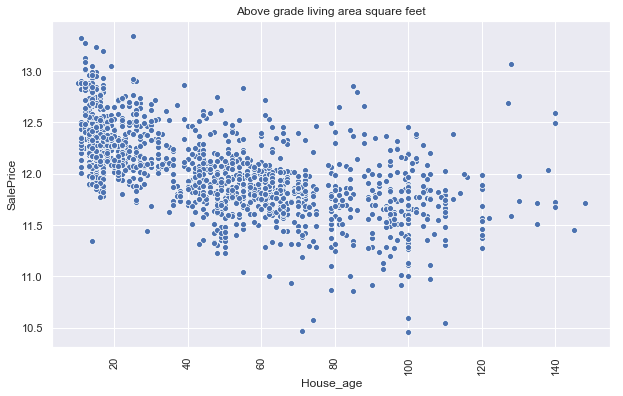

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="House_age", y="SalePrice", data= houses_df)
plt.title("Above grade living area square feet")
plt.xticks(rotation=90)


<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'> 
   It can be observed from the above plot if the house is old, saleprice is decreases steadily. 
</font></p>

## Creating dummy variables for Categorical features

In [60]:
houses_df.select_dtypes(include=['object'])

MSZoning Street            Alley LotShape LandContour Utilities  \
0          RL   Pave  No alley access      Reg         Lvl    AllPub   
1          RL   Pave  No alley access      Reg         Lvl    AllPub   
2          RL   Pave  No alley access      IR1         Lvl    AllPub   
3          RL   Pave  No alley access      IR1         Lvl    AllPub   
4          RL   Pave  No alley access      IR1         Lvl    AllPub   
5          RL   Pave  No alley access      IR1         Lvl    AllPub   
6          RL   Pave  No alley access      Reg         Lvl    AllPub   
7          RL   Pave  No alley access      IR1         Lvl    AllPub   
8          RM   Pave  No alley access      Reg         Lvl    AllPub   
9          RL   Pave  No alley access      Reg         Lvl    AllPub   
10         RL   Pave  No alley access      Reg         Lvl    AllPub   
11         RL   Pave  No alley access      IR1         Lvl    AllPub   
12         RL   Pave  No alley access      IR2         Lvl    AllPub   
13         RL   Pave  No alley access      IR1         Lvl    AllPub   
14         RL   Pave  No alley access      IR1         Lvl    AllPub   
15         RM   Pave  No alley access      Reg         Lvl    AllPub   
16         RL   Pave  No alley access      IR1         Lvl    AllPub   
17         RL   Pave  No alley access      Reg         Lvl    AllPub   
18         RL   Pave  No alley access      Reg         Lvl    AllPub   
19         RL   Pave  No alley access      Reg         Lvl    AllPub   
20         RL   Pave  No alley access      IR1         Lvl    AllPub   
21         RM   Pave             Grvl      Reg         Bnk    AllPub   
22         RL   Pave  No alley access      Reg         Lvl    AllPub   
23         RM   Pave  No alley access      Reg         Lvl    AllPub   
24         RL   Pave  No alley access      IR1         Lvl    AllPub   
25         RL   Pave  No alley access      Reg         Lvl    AllPub   
26         RL   Pave  No alley access      Reg         Lvl    AllPub   
27         RL   Pave  No alley access      Reg         Lvl    AllPub   
28         RL   Pave  No alley access      IR1         Lvl    AllPub   
29         RM   Pave  No alley access      IR1         Lvl    AllPub   
30    C (all)   Pave             Pave      Reg         Lvl    AllPub   
31         RL   Pave  No alley access      IR1         Lvl    AllPub   
32         RL   Pave  No alley access      Reg         Lvl    AllPub   
33         RL   Pave  No alley access      IR1         Lvl    AllPub   
34         RL   Pave  No alley access      Reg         Lvl    AllPub   
35         RL   Pave  No alley access      Reg         Lvl    AllPub   
36         RL   Pave  No alley access      Reg         Lvl    AllPub   
37         RL   Pave  No alley access      Reg         Lvl    AllPub   
38         RL   Pave  No alley access      Reg         Lvl    AllPub   
39         RL   Pave  No alley access      Reg         Lvl    AllPub   
40         RL   Pave  No alley access      Reg         Lvl    AllPub   
41         RL   Pave  No alley access      Reg         Lvl    AllPub   
42         RL   Pave  No alley access      IR1         Lvl    AllPub   
43         RL   Pave  No alley access      IR1         Lvl    AllPub   
44         RL   Pave  No alley access      Reg         Lvl    AllPub   
45         RL   Pave  No alley access      Reg         Lvl    AllPub   
46         RL   Pave  No alley access      IR1         Lvl    AllPub   
47         FV   Pave  No alley access      Reg         Lvl    AllPub   
48         RM   Pave  No alley access      Reg         Lvl    AllPub   
49         RL   Pave  No alley access      Reg         Lvl    AllPub   
50         RL   Pave  No alley access      IR2         Lvl    AllPub   
51         RM   Pave  No alley access      Reg         Lvl    AllPub   
52         RM   Grvl  No alley access      IR2         Bnk    AllPub   
53         RL   Pave  No alley access      IR1         Low    AllPub   
54         RL   Pave  No alley access      Re

In [61]:
houses_df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
# split into X and y

X = houses_df.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'CurrentYear', 'House_age']]

y = list(houses_df['SalePrice'])


In [63]:
X.shape

(1452, 81)

In [64]:
# creating dummy variables for categorical variables

houses_df_cat = X.select_dtypes(include=['object'])
houses_df_cat.head()

MSZoning Street            Alley LotShape LandContour Utilities LotConfig  \
0       RL   Pave  No alley access      Reg         Lvl    AllPub    Inside   
1       RL   Pave  No alley access      Reg         Lvl    AllPub       FR2   
2       RL   Pave  No alley access      IR1         Lvl    AllPub    Inside   
3       RL   Pave  No alley access      IR1         Lvl    AllPub    Corner   
4       RL   Pave  No alley access      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       Gd       TA           No          GLQ          Unf    GasA        Ex   
1       Gd       TA           Gd          ALQ          Unf    GasA        Ex   
2       Gd       TA           Mn          GLQ          Unf    GasA        Ex   
3       TA       Gd           No          ALQ          Unf    GasA        Gd   
4       Gd       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional   FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ  No Fireplace     Attchd   
1          Y      SBrkr          TA        Typ            TA     Attchd   
2          Y      SBrkr          Gd        Typ            TA     Attchd   
3          Y      SBrkr          Gd        Typ            Gd     Detchd   
4          Y      SBrkr          Gd        Typ            TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive   PoolQC     Fence  \
0          RFn         TA         TA          Y  No Pool  No Fence   
1          RFn         TA         TA          Y  No Pool  No Fence   
2          RFn         TA         TA          Y  No Pool  No Fence   
3          Unf         TA         TA          Y  No Pool  No Fence   
4          RFn         TA         TA          Y  No Pool  No Fence   

  MiscFeature SaleType SaleCondition  
0        None       WD        Normal  
1        None       WD        Normal  
2        None       WD        Normal  
3        None       WD       Abnorml  
4        None       WD        Normal

In [65]:
houses_df_cat.shape

(1452, 43)

In [66]:
houses_df_dummy = pd.get_dummies(houses_df_cat, drop_first=True)
houses_df_dummy.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_No alley access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0                      1           0             0             0   
1                      1           0             0             0   
2                      1           0             0             0   
3                      1           0             0             0   
4                      1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0

In [67]:
houses_df_dummy.shape

(1452, 222)

In [68]:
# drop categorical variables 
X = X.drop(list(houses_df_cat.columns), axis=1)

In [69]:
# concat dummy variables with X
X = pd.concat([X, houses_df_dummy], axis=1)

In [70]:
X['House_age'].head()

0     17
1     44
2     19
3    105
4     20
Name: House_age, dtype: int64

In [71]:
#Identifying the percentage of null values for all the columns in a dataframe

round(100*(X.isnull().sum()/len(X)),2)

MSSubClass                  0.0
LotFrontage                 0.0
LotArea                     0.0
OverallQual                 0.0
OverallCond                 0.0
YearBuilt                   0.0
YearRemodAdd                0.0
MasVnrArea                  0.0
BsmtFinSF1                  0.0
BsmtFinSF2                  0.0
BsmtUnfSF                   0.0
TotalBsmtSF                 0.0
1stFlrSF                    0.0
2ndFlrSF                    0.0
LowQualFinSF                0.0
GrLivArea                   0.0
BsmtFullBath                0.0
BsmtHalfBath                0.0
FullBath                    0.0
HalfBath                    0.0
BedroomAbvGr                0.0
KitchenAbvGr                0.0
TotRmsAbvGrd                0.0
Fireplaces                  0.0
GarageYrBlt                 0.0
GarageCars                  0.0
GarageArea                  0.0
WoodDeckSF                  0.0
OpenPorchSF                 0.0
EnclosedPorch               0.0
3SsnPorch                   0.0
ScreenPo

In [72]:
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   CurrentYear  House_age  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0         2020         17            0            0            1            0   
1         2020         44            0            0            1            0   
2         2020         19            0            0            1            0   
3         2020        105            0            0            1            0   
4         2020         20            0            0            1            0   

   Street_Pave  Alley_No alley access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0            1                      1           0             0             0   
1            1                      1           0             0             0   
2            1                      1           0             0             0   
3            1                      1           0             0             0   
4            1                      1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                

In [73]:
list(X.columns)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'CurrentYear',
 'House_age',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_No alley access',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_Br

In [74]:
# Applying standard scalar to the variables except the yes-no and dummy variables

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [75]:
# Apply StandardScaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'CurrentYear',
 'House_age']

X[num_vars] = scaler.fit_transform(X[num_vars])

In [76]:
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.072017    -0.216887 -0.202045     0.671003    -0.518365   1.056754   
1   -0.872169     0.500798 -0.085529    -0.061551     2.172931   0.162327   
2    0.072017    -0.073350  0.081647     0.671003    -0.518365   0.990500   
3    0.308063    -0.456116 -0.090595     0.671003    -0.518365  -1.858417   
4    0.072017     0.692181  0.386615     1.403557    -0.518365   0.957373   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.882886    0.533909    0.631990   -0.286789  -0.943368    -0.475906   
1     -0.424683   -0.573047    1.267147   -0.286789  -0.638971     0.537053   
2      0.834458    0.341886    0.118260   -0.286789  -0.298229    -0.316227   
3     -0.715254   -0.573047   -0.512226   -0.286789  -0.057438    -0.725403   
4      0.737601    1.403661    0.512898   -0.286789  -0.171019     0.245141   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.821183  1.181501     -0.120577   0.415020      1.115945     -0.240166   
1  0.294698 -0.797083     -0.120577  -0.490594     -0.817650      3.961299   
2 -0.645280  1.209303     -0.120577   0.568651      1.115945     -0.240166   
3 -0.532593  0.954450     -0.120577   0.429171      1.115945     -0.240166   
4 -0.026873  1.642553     -0.120577   1.401493      1.115945     -0.240166   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.805154  1.230784      0.166316     -0.212061      0.932331    -0.95077   
1  0.805154 -0.759303      0.166316     -0.212061     -0.311348     0.61267   
2  0.805154  1.230784      0.166316     -0.212061     -0.311348     0.61267   
3 -1.024398 -0.759303      0.166316     -0.212061      0.310492     0.61267   
4  0.805154  1.230784      1.392155     -0.212061      1.554171     0.61267   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     1.022996    0.318707    0.362767   -0.749572     0.225613   
1    -0.102584    0.318707   -0.052619    1.630743    -0.707258   
2     0.939620    0.318707    0.645984   -0.749572    -0.064953   
3     0.814555    1.660048    0.806474   -0.749572    -0.172004   
4     0.897931    1.660048    1.722210    0.784054     0.577352   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
0       -0.35955  -0.116664    -0.269619 -0.058196 -0.087931 -1.603663   
1       -0.35955  -0.116664    -0.269619 -0.058196 -0.087931 -0.491845   
2       -0.35955  -0.116664    -0.269619 -0.058196 -0.087931  0.990580   
3        4.11127  -0.116664    -0.269619 -0.058196 -0.087931 -1.603663   
4       -0.35955  -0.116664    -0.269619 -0.058196 -0.087931  2.102399   

     YrSold  CurrentYear  House_age  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0  0.138273          0.0  -1.056754            0            0            1   
1 -0.613685          0.0  -0.162327            0            0            1   
2  0.138273          0.0  -0.990500            0            0            1   
3 -1.365644          0.0   1.858417            0            0            1   
4  0.138273          0.0  -0.957373            0            0            1   

   MSZoning_RM  Street_Pave  Alley_No alley access  Alley_Pave  LotShape_IR2  \
0            0            1                      1           0             0   
1            0            1                      1           0             0   
2            0            1                      1           0             0   
3            0            1                      1           0             0   
4            0            1                      1           0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0         

In [77]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [78]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
25     -0.872169     1.936170  0.383575     1.403557    -0.518365   1.189262   
88     -0.164030     1.696941 -0.200018    -2.259212    -3.209661  -1.858417   
985     3.140620    -0.073350  0.044159    -0.794104    -0.518365  -0.698974   
1444   -0.872169    -0.312579 -0.196979     0.671003    -0.518365   1.089881   
1107    0.072017     4.711221  1.298176     0.671003    -0.518365   1.156135   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
25        1.076600    3.041505   -1.016615   -0.286789   2.273238   
88       -0.134112   -0.573047   -1.016615   -0.286789   1.017035   
985      -1.683824   -0.573047    1.411925   -0.286789  -1.002429   
1444      0.931314    0.025613   -1.016615   -0.286789   1.946126   
1107      1.028171   -0.573047   -1.016615   -0.286789   0.687651   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
25       1.295525  1.223683 -0.797083     -0.120577   0.192660     -0.817650   
88      -0.084195 -0.389672 -0.797083     10.405047   0.043072     -0.817650   
985      0.292546  0.025348 -0.797083     -0.120577  -0.688697      1.115945   
1444     0.936249  0.734454 -0.797083     -0.120577  -0.167160     -0.817650   
1107    -0.445966 -0.735980  1.830217     -0.120577   1.043695     -0.817650   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
25       -0.240166  0.805154 -0.759303      0.166316     -0.212061   
88       -0.240166 -1.024398 -0.759303     -1.059524     -0.212061   
985      -0.240166 -1.024398 -0.759303      0.166316     -0.212061   
1444     -0.240166  0.805154 -0.759303      0.166316     -0.212061   
1107     -0.240166  0.805154  1.230784      0.166316     -0.212061   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
25        0.310492     0.61267     1.189748    1.660048    1.977106   
88       -0.311348    -0.95077     0.064169   -2.363976   -2.223952   
985      -0.933188    -0.95077    -1.186475   -1.022634   -1.091083   
1444      0.310492    -0.95077     1.064684    0.318707    0.730949   
1107      1.554171     0.61267     1.148060    0.318707   -0.231990   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
25     -0.749572     0.149149      -0.359550  -0.116664    -0.269619   
88     -0.749572    -0.707258       2.204597  -0.116664    -0.269619   
985    -0.749572     0.026805      -0.359550  -0.116664    -0.269619   
1444    0.784054     0.210320      -0.359550  -0.116664    -0.269619   
1107   -0.749572     0.822039      -0.359550  -0.116664    -0.269619   

      PoolArea   MiscVal    MoSold    YrSold  CurrentYear  House_age  \
25   -0.058196 -0.087931  0.249368  0.890232          0.0  -1.189262   
88   -0.058196 -0.087931  1.361187  0.890232          0.0   1.858417   
985  -0.058196 -0.087931  0.619974  0.138273          0.0   0.698974   
1444 -0.058196 -0.087931  1.731793 -0.613685          0.0  -1.089881   
1107 -0.058196 -0.087931  0.990580 -1.365644          0.0  -1.156135   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
25              0            0            1            0            1   
88              0            0            0            0            1   
985             0            0            1            0            1   
1444            0            0            1            0            1   
1107            0            0            1            0            1   

      Alley_No alley access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
25                        1           0             0             0   
88                        1           0             0             0   
985                       1           0             0             0   
1444                      1           0             0             0   
1107                      1           0             0             1   

      LotShape_Reg  LandContour_HLS  LandContour_

## Model Building and Feature Selection using RFE technique

In [79]:
# Importing RFE 
from sklearn.feature_selection import RFE

In [80]:
# Running RFE with the output number of the variable equal to 100
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 100)             # running RFE and selecting 100 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 160),
 ('LotFrontage', False, 104),
 ('LotArea', False, 33),
 ('OverallQual', True, 1),
 ('OverallCond', False, 11),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 96),
 ('MasVnrArea', False, 139),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 100),
 ('BsmtHalfBath', False, 157),
 ('FullBath', False, 147),
 ('HalfBath', False, 132),
 ('BedroomAbvGr', False, 152),
 ('KitchenAbvGr', False, 129),
 ('TotRmsAbvGrd', False, 135),
 ('Fireplaces', False, 158),
 ('GarageYrBlt', False, 146),
 ('GarageCars', False, 68),
 ('GarageArea', False, 41),
 ('WoodDeckSF', False, 112),
 ('OpenPorchSF', False, 118),
 ('EnclosedPorch', False, 113),
 ('3SsnPorch', False, 145),
 ('ScreenPorch', False, 106),
 ('PoolArea', True, 1),
 ('MiscVal', False, 128),
 ('MoSold', False, 161),
 ('YrSold', False, 154)

In [82]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'PoolArea', 'CurrentYear', 'House_age', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Utilities_NoSeWa', 'LandSlope_Sev',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNn', 'Condition2_Feedr',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_Duplex',
       'HouseStyle_2.5Fin', 'RoofStyle_Shed', 'RoofMatl_Membran',
       'RoofMatl_WdShake', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po',

In [83]:
X_train.columns[~rfe.support_]


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'Fence_MnPrv', 'Fence_MnWw', 'Fence_No Fence', 'SaleType_CWD',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=160)

In [84]:
X_train_rfe = X_train[col]

In [85]:
# predict
from sklearn import metrics
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9493117676113261

In [86]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-6097434931215190.0





<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'>
    we can see that Test R2 isvery low, hence we will be applying ridge and lasso regression methods for modelling
    
</font></p>

In [87]:
 X_test.columns[rfe.support_]

Index(['OverallQual', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'PoolArea', 'CurrentYear', 'House_age', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Utilities_NoSeWa', 'LandSlope_Sev',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNn', 'Condition2_Feedr',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_Duplex',
       'HouseStyle_2.5Fin', 'RoofStyle_Shed', 'RoofMatl_Membran',
       'RoofMatl_WdShake', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po',

## Ridge Regression

In [88]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [89]:

print("Best parameters:")
print(model_cv.best_params_)

Best parameters:
{'alpha': 20}


In [90]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.015614  1.356482e-05         0.000000    0.000000e+00      0.0001   
1        0.015622  1.767516e-06         0.000000    0.000000e+00       0.001   
2        0.012350  1.021154e-02         0.000199    3.985405e-04        0.01   
3        0.015621  2.334068e-06         0.000000    0.000000e+00        0.05   
4        0.015724  2.460410e-04         0.001598    1.957289e-03         0.1   
5        0.020010  3.585292e-03         0.000000    0.000000e+00         0.2   
6        0.015768  2.932891e-04         0.000000    0.000000e+00         0.3   
7        0.015421  7.441217e-03         0.000399    4.882273e-04         0.4   
8        0.010022  6.935466e-03         0.000000    0.000000e+00         0.5   
9        0.012497  6.248355e-03         0.000000    0.000000e+00         0.6   
10       0.012497  6.248403e-03         0.000000    0.000000e+00         0.7   
11       0.012497  6.248498e-03         0.000000    0.000000e+00         0.8   
12       0.015622  2.524987e-06         0.000000    0.000000e+00         0.9   
13       0.006249  7.653195e-03         0.003124    6.247997e-03           1   
14       0.006249  7.653079e-03         0.000000    0.000000e+00           2   
15       0.014053  4.597074e-03         0.000398    4.878186e-04           3   
16       0.012772  5.699330e-03         0.000000    0.000000e+00           4   
17       0.003125  6.249332e-03         0.003124    6.247711e-03           5   
18       0.015622  1.302385e-06         0.000000    0.000000e+00           6   
19       0.018746  6.248474e-03         0.000000    0.000000e+00           7   
20       0.016431  1.620341e-03         0.000000    0.000000e+00           8   
21       0.012567  1.620270e-03         0.000997    9.344062e-07           9   
22       0.014214  2.496356e-03         0.000000    0.000000e+00          10   
23       0.015621  6.325960e-07         0.000000    0.000000e+00          20   
24       0.006249  7.653254e-03         0.006248    7.652495e-03          50   
25       0.006248  7.652553e-03         0.000000    0.000000e+00         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.092400          -0.096682   
1    {'alpha': 0.001}          -0.092283          -0.096676   
2     {'alpha': 0.01}          -0.091276          -0.096638   
3     {'alpha': 0.05}          -0.088617          -0.096260   
4      {'alpha': 0.1}          -0.087038          -0.095778   
5      {'alpha': 0.2}          -0.085371          -0.094989   
6      {'alpha': 0.3}          -0.084343          -0.094399   
7      {'alpha': 0.4}          -0.083548          -0.093940   
8      {'alpha': 0.5}          -0.082970          -0.093538   
9      {'alpha': 0.6}          -0.082484          -0.093184   
10     {'alpha': 0.7}          -0.082072          -0.092868   
11     {'alpha': 0.8}          -0.081740          -0.092611   
12     {'alpha': 0.9}          -0.081438          -0.092396   
13     {'alpha': 1.0}          -0.081158          -0.092199   
14     {'alpha': 2.0}          -0.079190          -0.090972   
15     {'alpha': 3.0}          -0.078190          -0.090220   
16     {'alpha': 4.0}          -0.077676          -0.089871   
17     {'alpha': 5.0}          -0.077304          -0.089642   
18     {'alpha': 6.0}          -0.077013          -0.089479   
19     {'alpha': 7.0}          -0.076806          -0.089397   
20     {'alpha': 8.0}          -0.076663          -0.089326   
21     {'alpha': 9.0}          -0.076579          -0.089250   
22    {'alpha': 10.0}          -0.076494          -0.089171   
23      {'alpha': 20}          -0.076093          -0.088723   
24      {'alpha': 50}          -0.075855          -0.088692   
25     {'alpha': 100}          -0.076164          -0.089239   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           -0.084815          -0.094707          -0.092495  

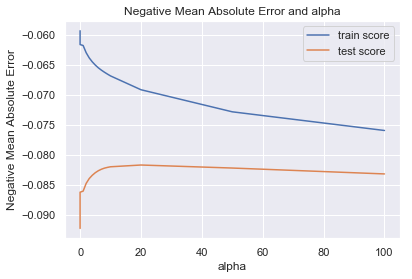

In [91]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [92]:
# since the Negative Mean Absolute Error stabilises at alpha = 20.0, we will choose this for further analysis

alpha = 20.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.29786558e-02,  8.35382961e-03,  1.93864534e-02,  6.72542960e-02,
        5.43990904e-02,  2.91310375e-02,  1.73024873e-02,  1.46954295e-03,
        3.04206196e-02,  7.88862317e-03,  4.73063347e-03,  4.08627623e-02,
        4.14461977e-02,  4.70989750e-02, -1.90236416e-04,  7.15584526e-02,
        1.63265767e-02,  1.72468367e-03,  8.61821602e-03,  1.21358952e-02,
        7.76847905e-04, -1.16802308e-02,  1.04927237e-02,  1.17066909e-02,
       -1.57664856e-03,  2.04153602e-02,  1.08096431e-02,  1.06430765e-02,
        1.10216432e-02,  9.72858292e-03,  3.15789924e-03,  1.11551837e-02,
       -2.24252064e-03, -4.50623134e-03,  1.93581940e-03, -3.10902732e-03,
        0.00000000e+00, -2.91310375e-02,  3.47817458e-02,  1.30720412e-02,
        3.77218155e-02, -1.69578823e-02,  2.89243668e-02, -8.28098838e-03,
        1.96670150e-02,  4.09113349e-03, -6.99371634e-03, -1.13055224e-03,
        1.55472668e-02,  1.29861488e-03,  2.14824356e-03,  0.00000000e+00,
        2.79570796e-02, -

In [94]:
model_params = list(ridge.coef_)
model_params.insert(0, ridge.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params))

[('constant', 11.775),
 ('MSSubClass', -0.013),
 ('LotFrontage', 0.008),
 ('LotArea', 0.019),
 ('OverallQual', 0.067),
 ('OverallCond', 0.054),
 ('YearBuilt', 0.029),
 ('YearRemodAdd', 0.017),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.008),
 ('BsmtUnfSF', 0.005),
 ('TotalBsmtSF', 0.041),
 ('1stFlrSF', 0.041),
 ('2ndFlrSF', 0.047),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.072),
 ('BsmtFullBath', 0.016),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.009),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.001),
 ('KitchenAbvGr', -0.012),
 ('TotRmsAbvGrd', 0.01),
 ('Fireplaces', 0.012),
 ('GarageYrBlt', -0.002),
 ('GarageCars', 0.02),
 ('GarageArea', 0.011),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', 0.011),
 ('EnclosedPorch', 0.01),
 ('3SsnPorch', 0.003),
 ('ScreenPorch', 0.011),
 ('PoolArea', -0.002),
 ('MiscVal', -0.005),
 ('MoSold', 0.002),
 ('YrSold', -0.003),
 ('CurrentYear', 0.0),
 ('House_age', -0.029),
 ('MSZoning_FV', 0.035),
 ('MSZoning_RH', 0.013),
 ('MSZoning_RL', 0.

In [95]:
# ridge regression
lm = Ridge(alpha=20)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9350372554090748
0.9172893546186391


In [96]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11594020658054788





<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'>
    we can see that both train and test scores are really good in case of ridge regression. Now let's check the same for Lasso regression
    
</font></p>


In [97]:

ridge_params= pd.DataFrame(list(zip(cols, model_params)))
ridge_params.columns = ['feature', 'Coefficient']
ridge_params.sort_values((['Coefficient']), axis = 0, ascending = False, inplace=True)
ridge_params.head()

feature  Coefficient
0                constant       11.775
64   Neighborhood_Crawfor        0.074
16              GrLivArea        0.072
4             OverallQual        0.067
259  SaleCondition_Normal        0.054

In [98]:
ridge_params[(ridge_params['Coefficient'] != 0)]

feature  Coefficient
0                    constant       11.775
64       Neighborhood_Crawfor        0.074
16                  GrLivArea        0.072
4                 OverallQual        0.067
259      SaleCondition_Normal        0.054
5                 OverallCond        0.054
210            Functional_Typ        0.052
84            Condition1_Norm        0.049
14                   2ndFlrSF        0.047
80       Neighborhood_StoneBr        0.046
172           BsmtExposure_Gd        0.044
12                TotalBsmtSF        0.041
13                   1stFlrSF        0.041
122       Exterior1st_BrkFace        0.039
41                MSZoning_RL        0.038
253              SaleType_New        0.036
260     SaleCondition_Partial        0.036
39                MSZoning_FV        0.035
160          Foundation_PConc        0.035
197              CentralAir_Y        0.033
9                  BsmtFinSF1        0.030
6                   YearBuilt        0.029
43                Street_Pave        0.029
53          LotConfig_CulDSac        0.028
188              Heating_GasA        0.027
74       Neighborhood_NridgHt        0.026
79       Neighborhood_Somerst        0.025
61       Neighborhood_BrkSide        0.023
151          MasVnrType_Stone        0.023
177          BsmtFinType1_GLQ        0.020
45                 Alley_Pave        0.020
168               BsmtCond_Gd        0.020
26                 GarageCars        0.020
3                     LotArea        0.019
206           Functional_Min1        0.018
7                YearRemodAdd        0.017
62       Neighborhood_ClearCr        0.017
17               BsmtFullBath        0.016
207           Functional_Min2        0.016
49            LandContour_HLS        0.016
86            Condition1_PosN        0.015
108           HouseStyle_SLvl        0.014
183          BsmtFinType2_GLQ        0.014
88            Condition1_RRAn        0.014
216         GarageType_Attchd        0.013
40                MSZoning_RH        0.013
254              SaleType_Oth        0.013
158              ExterCond_TA        0.013
20                   HalfBath        0.012
24                 Fireplaces        0.012
171               BsmtCond_TA        0.012
187          BsmtFinType2_Unf        0.011
27                 GarageArea        0.011
161           Foundation_Slab        0.011
218        GarageType_BuiltIn        0.011
32                ScreenPorch        0.011
28                 WoodDeckSF        0.011
243            Fence_No Fence        0.011
248              SaleType_CWD        0.011
234             GarageCond_TA        0.011
29                OpenPorchSF        0.011
23               TotRmsAbvGrd        0.010
236              PavedDrive_Y        0.010
30              EnclosedPorch        0.010
83           Condition1_Feedr        0.010
82       Neighborhood_Veenker        0.010
176          BsmtFinType1_BLQ        0.009
226             GarageQual_Gd        0.009
19                   FullBath        0.009
229             GarageQual_TA        0.009
141       Exterior2nd_MetalSd        0.009
91           Condition2_Feedr        0.009
256     SaleCondition_AdjLand        0.008
10                 BsmtFinSF2        0.008
2                 LotFrontage        0.008
99            BldgType_Duplex        0.008
192              Heating_Wall        0.008
212            FireplaceQu_Gd        0.008
241               Fence_MnPrv        0.008
238                 PoolQC_Gd        0.008
73       Neighborhood_NoRidge        0.008
76         Neighborhood_SWISU        0.007
220         GarageType_Detchd        0.007
244          MiscFeature_None        0.007
249              SaleType_Con        0.007
105         HouseStyle_2.5Unf        0.007
110         RoofStyle_Gambrel        0.006
114          RoofMatl_Membran        0.006
131       Exterior1st_VinylSd        0.006
112         RoofStyle_Mansard        0.006
136       Exterior2nd_BrkFace        0.005
127       Exterior1st_MetalSd        0.005
98            BldgType_




<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'>
    we can see that though ridge regression r2 scores are really good, but it has selected a lot many features as important features which is not ideal case. Hence let's use Lasso to check for feature selection in depth
    
</font></p>


## What if we doubled the value of alpha for ridge regression!!! 

In [99]:
# since the Negative Mean Absolute Error stabilises at alpha = 20.0, we will choose this for further analysis

alpha = 40.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.23540869e-02,  8.91892620e-03,  1.86326450e-02,  6.94535557e-02,
        5.45431387e-02,  2.84500696e-02,  1.77438769e-02,  3.45086381e-03,
        3.10674624e-02,  7.07251965e-03,  5.08974099e-03,  4.16209616e-02,
        4.06330615e-02,  4.30076015e-02, -5.69531921e-04,  6.73532843e-02,
        1.67670648e-02,  1.76330761e-03,  1.03405871e-02,  1.34240603e-02,
        3.76203143e-04, -1.14564248e-02,  1.28584813e-02,  1.47355329e-02,
       -7.10423897e-04,  2.02085483e-02,  1.26941161e-02,  1.04870662e-02,
        1.11726657e-02,  9.17080028e-03,  3.08771310e-03,  1.08219091e-02,
       -2.56415293e-03, -6.07105843e-03,  2.67471651e-03, -3.32560735e-03,
        0.00000000e+00, -2.84500696e-02,  2.45318758e-02,  7.35650115e-03,
        3.04436955e-02, -2.42841366e-02,  1.70847542e-02, -6.27574973e-03,
        1.50916018e-02,  3.38000237e-03, -4.17332048e-03, -3.25888700e-03,
        1.32289348e-02,  1.56142098e-03, -2.16941194e-03,  0.00000000e+00,
        2.12796686e-02, -

In [100]:
model_params = list(ridge.coef_)
model_params.insert(0, ridge.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params))

[('constant', 11.834),
 ('MSSubClass', -0.012),
 ('LotFrontage', 0.009),
 ('LotArea', 0.019),
 ('OverallQual', 0.069),
 ('OverallCond', 0.055),
 ('YearBuilt', 0.028),
 ('YearRemodAdd', 0.018),
 ('MasVnrArea', 0.003),
 ('BsmtFinSF1', 0.031),
 ('BsmtFinSF2', 0.007),
 ('BsmtUnfSF', 0.005),
 ('TotalBsmtSF', 0.042),
 ('1stFlrSF', 0.041),
 ('2ndFlrSF', 0.043),
 ('LowQualFinSF', -0.001),
 ('GrLivArea', 0.067),
 ('BsmtFullBath', 0.017),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.01),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.011),
 ('TotRmsAbvGrd', 0.013),
 ('Fireplaces', 0.015),
 ('GarageYrBlt', -0.001),
 ('GarageCars', 0.02),
 ('GarageArea', 0.013),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.011),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.003),
 ('ScreenPorch', 0.011),
 ('PoolArea', -0.003),
 ('MiscVal', -0.006),
 ('MoSold', 0.003),
 ('YrSold', -0.003),
 ('CurrentYear', 0.0),
 ('House_age', -0.028),
 ('MSZoning_FV', 0.025),
 ('MSZoning_RH', 0.007),
 ('MSZoning_RL', 0

In [101]:
# ridge regression
lm = Ridge(alpha=40)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9304766066190616
0.9158815539296488


In [102]:

ridge_params= pd.DataFrame(list(zip(cols, model_params)))
ridge_params.columns = ['feature', 'Coefficient']
ridge_params.sort_values((['Coefficient']), axis = 0, ascending = False, inplace=True)
ridge_params.head()

feature  Coefficient
0               constant       11.834
4            OverallQual        0.069
16             GrLivArea        0.067
5            OverallCond        0.055
64  Neighborhood_Crawfor        0.053

In [103]:
ridge_params[(ridge_params['Coefficient'] != 0)]

feature  Coefficient
0                    constant       11.834
4                 OverallQual        0.069
16                  GrLivArea        0.067
5                 OverallCond        0.055
64       Neighborhood_Crawfor        0.053
14                   2ndFlrSF        0.043
12                TotalBsmtSF        0.042
259      SaleCondition_Normal        0.041
13                   1stFlrSF        0.041
210            Functional_Typ        0.039
84            Condition1_Norm        0.039
172           BsmtExposure_Gd        0.035
160          Foundation_PConc        0.031
9                  BsmtFinSF1        0.031
253              SaleType_New        0.030
41                MSZoning_RL        0.030
260     SaleCondition_Partial        0.030
6                   YearBuilt        0.028
80       Neighborhood_StoneBr        0.028
122       Exterior1st_BrkFace        0.028
197              CentralAir_Y        0.027
39                MSZoning_FV        0.025
79       Neighborhood_Somerst        0.021
53          LotConfig_CulDSac        0.021
177          BsmtFinType1_GLQ        0.020
26                 GarageCars        0.020
74       Neighborhood_NridgHt        0.020
3                     LotArea        0.019
188              Heating_GasA        0.019
7                YearRemodAdd        0.018
151          MasVnrType_Stone        0.017
61       Neighborhood_BrkSide        0.017
17               BsmtFullBath        0.017
43                Street_Pave        0.017
24                 Fireplaces        0.015
158              ExterCond_TA        0.015
45                 Alley_Pave        0.015
168               BsmtCond_Gd        0.014
27                 GarageArea        0.013
23               TotRmsAbvGrd        0.013
20                   HalfBath        0.013
49            LandContour_HLS        0.013
62       Neighborhood_ClearCr        0.012
236              PavedDrive_Y        0.012
32                ScreenPorch        0.011
29                OpenPorchSF        0.011
216         GarageType_Attchd        0.011
234             GarageCond_TA        0.010
19                   FullBath        0.010
28                 WoodDeckSF        0.010
218        GarageType_BuiltIn        0.010
229             GarageQual_TA        0.009
108           HouseStyle_SLvl        0.009
171               BsmtCond_TA        0.009
187          BsmtFinType2_Unf        0.009
2                 LotFrontage        0.009
212            FireplaceQu_Gd        0.009
30              EnclosedPorch        0.009
243            Fence_No Fence        0.009
141       Exterior2nd_MetalSd        0.008
206           Functional_Min1        0.008
176          BsmtFinType1_BLQ        0.008
183          BsmtFinType2_GLQ        0.008
254              SaleType_Oth        0.007
88            Condition1_RRAn        0.007
86            Condition1_PosN        0.007
40                MSZoning_RH        0.007
207           Functional_Min2        0.007
82       Neighborhood_Veenker        0.007
10                 BsmtFinSF2        0.007
73       Neighborhood_NoRidge        0.006
241               Fence_MnPrv        0.006
226             GarageQual_Gd        0.006
248              SaleType_CWD        0.006
161           Foundation_Slab        0.006
127       Exterior1st_MetalSd        0.005
91           Condition2_Feedr        0.005
76         Neighborhood_SWISU        0.005
99            BldgType_Duplex        0.005
136       Exterior2nd_BrkFace        0.005
244          MiscFeature_None        0.005
11                  BsmtUnfSF        0.005
110         RoofStyle_Gambrel        0.004
101           BldgType_TwnhsE        0.004
105         HouseStyle_2.5Unf        0.004
192              Heating_Wall        0.004
249              SaleType_Con        0.004
238                 PoolQC_Gd        0.004
220         GarageType_Detchd        0.004
57              LandSlope_Mod        0.004
256     SaleCondition_AdjLand        0.003
31                  3SsnPorch        0.003
144         Exterior2nd

## Lasso Regression

In [104]:
params = {'alpha': [ 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [105]:
print("Best parameters:")
print(model_cv.best_params_)

Best parameters:
{'alpha': 0.001}


In [106]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]

cv_results.head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.157390      0.038564         0.000000        0.000000      0.0001   
1       0.021870      0.007652         0.000000        0.000000       0.001   
2       0.014311      0.001259         0.000599        0.000489        0.01   
3       0.016356      0.002410         0.000399        0.000489        0.05   
4       0.011526      0.003124         0.000599        0.000489         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.080040          -0.090110          -0.081783   
1   {'alpha': 0.001}          -0.074811          -0.086315          -0.080068   
2    {'alpha': 0.01}          -0.083348          -0.095009          -0.090376   
3    {'alpha': 0.05}          -0.105944          -0.124019          -0.116452   
4     {'alpha': 0.1}          -0.140199          -0.164969          -0.162167   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.084642          -0.087561        -0.084822        0.003678   
1          -0.079119          -0.083806        -0.080818        0.003969   
2          -0.087794          -0.095841        -0.090467        0.004636   
3          -0.111875          -0.122076        -0.116063        0.006631   
4          -0.146588          -0.154117        -0.153595        0.009296   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.063010           -0.061234   
1                1           -0.074048           -0.070255   
2                3           -0.089170           -0.087136   
3                4           -0.115805           -0.114505   
4                5           -0.152635           -0.152343   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.063327           -0.063434           -0.061390   
1           -0.071909           -0.073402           -0.070199   
2           -0.087680           -0.090269           -0.086980   
3           -0.116216           -0.115169           -0.111487   
4           -0.153316           -0.152298           -0.149001   

   mean_train_score  std_train_score  
0         -0.062479         0.000964  
1         -0.071963         0.001578  
2         -0.088247         0.001273  
3         -0.114636         0.001678  
4         -0.151919         0.001503

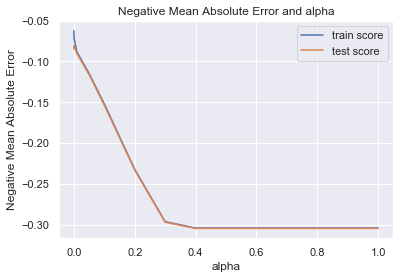

In [107]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()






<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'>
    we can see that though lasso regression mean absolute error is quite low as compared to ridge regression as alpha=0.4 and then it becomes constant. hence to we will choose the low value of alpha to balance between bias variance tradeoff and to select more important features using lasso
    
</font></p>


In [108]:

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
lasso.coef_

array([-0.00783729,  0.00631359,  0.01605388,  0.10258601,  0.04383656,
        0.07018198,  0.02284086,  0.        ,  0.03190441,  0.        ,
       -0.        ,  0.05006934,  0.        ,  0.        , -0.        ,
        0.13235406,  0.01179678,  0.        ,  0.        ,  0.        ,
        0.        , -0.00816715,  0.        ,  0.0233688 ,  0.        ,
        0.03065521,  0.01489382,  0.00398218,  0.00490858,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.00946884,  0.        ,  0.        ,
        0.        , -0.01046741,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.  

In [117]:
# lasso model parameters
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params))

[('constant', 12.019),
 ('MSSubClass', -0.008),
 ('LotFrontage', 0.006),
 ('LotArea', 0.016),
 ('OverallQual', 0.103),
 ('OverallCond', 0.044),
 ('YearBuilt', 0.07),
 ('YearRemodAdd', 0.023),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.05),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.132),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.008),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.023),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.031),
 ('GarageArea', 0.015),
 ('WoodDeckSF', 0.004),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.0),
 ('YrSold', -0.0),
 ('CurrentYear', 0.0),
 ('House_age', -0.009),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.01),
 ('Street

In [118]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8936526601629362
0.8984129698457156


In [119]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1284909372881286


In [120]:

lasso_params = pd.DataFrame(list(zip(cols, model_params)))
lasso_params.columns = ['feature', 'Coefficient']
lasso_params.sort_values((['Coefficient']), axis = 0, ascending = False, inplace=True)
lasso_params.head(10)

feature  Coefficient
0       constant       12.019
16     GrLivArea        0.132
4    OverallQual        0.103
6      YearBuilt        0.070
12   TotalBsmtSF        0.050
5    OverallCond        0.044
9     BsmtFinSF1        0.032
26    GarageCars        0.031
7   YearRemodAdd        0.023
24    Fireplaces        0.023

In [121]:
lasso_params[(lasso_params['Coefficient'] != 0)]

feature  Coefficient
0       constant       12.019
16     GrLivArea        0.132
4    OverallQual        0.103
6      YearBuilt        0.070
12   TotalBsmtSF        0.050
5    OverallCond        0.044
9     BsmtFinSF1        0.032
26    GarageCars        0.031
7   YearRemodAdd        0.023
24    Fireplaces        0.023
3        LotArea        0.016
27    GarageArea        0.015
17  BsmtFullBath        0.012
2    LotFrontage        0.006
29   OpenPorchSF        0.005
28    WoodDeckSF        0.004
22  KitchenAbvGr       -0.008
1     MSSubClass       -0.008
38     House_age       -0.009
42   MSZoning_RM       -0.010




<p style="font-size:1.5em;color:blue;"><u> </u> </p>
<p style="font-size:1.1em;">
<font color='Blue'>
    All the above variables obtained using Lasso regression has more impact on the house sale price.
</font></p>


## What if we doubled the value of alpha for Lasso regression

In [122]:
# lasso regression
lm = Lasso(alpha=0.02)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8792611418015381
0.8902953014320457


In [123]:

lasso_params = pd.DataFrame(list(zip(cols, model_params)))
lasso_params.columns = ['feature', 'Coefficient']
lasso_params.sort_values((['Coefficient']), axis = 0, ascending = False, inplace=True)
lasso_params.head(10)

feature  Coefficient
0       constant       12.019
16     GrLivArea        0.132
4    OverallQual        0.103
6      YearBuilt        0.070
12   TotalBsmtSF        0.050
5    OverallCond        0.044
9     BsmtFinSF1        0.032
26    GarageCars        0.031
7   YearRemodAdd        0.023
24    Fireplaces        0.023

In [124]:
lasso_params[(lasso_params['Coefficient'] != 0)]

feature  Coefficient
0       constant       12.019
16     GrLivArea        0.132
4    OverallQual        0.103
6      YearBuilt        0.070
12   TotalBsmtSF        0.050
5    OverallCond        0.044
9     BsmtFinSF1        0.032
26    GarageCars        0.031
7   YearRemodAdd        0.023
24    Fireplaces        0.023
3        LotArea        0.016
27    GarageArea        0.015
17  BsmtFullBath        0.012
2    LotFrontage        0.006
29   OpenPorchSF        0.005
28    WoodDeckSF        0.004
22  KitchenAbvGr       -0.008
1     MSSubClass       -0.008
38     House_age       -0.009
42   MSZoning_RM       -0.010

# Conclusion

Below are the final feature that should be used for predicting the price of a house and they descibe the model very well.
<br><br>
- GrLivArea <br>
- OverallQual<br>
- YearBuilt<br>
- TotalBsmtSF<br>
- OverallCond<br>
- BsmtFinSF1<br>
- GarageCars<br>
- YearRemodAdd<br>
- Fireplaces<br>
- LotArea<br>
- GarageArea<br>
- BsmtFullBath<br>
- LotFrontage<br>
- OpenPorchSF<br>
- WoodDeckSF<br>
- KitchenAbvGr<br>
- MSSubClass<br>
- House_age<br>
- MSZoning_RM<br>

<br>The positive value of coefficients indicates the increase in sale price where as negative value of coefficient indicates low value of sale price.<br>
<br>
Optimal value of alpha for ridge regression is 20.
<br>

Optimal value of alpha for lasso regression is 0.01

